#Mini Project - Dataset 4: Aviation Accident Database

## Team FE1T06
### Ang Kai Siang - U1922045B
### Kesarimangalam Srinivasan Abhinaya - U1923302J
### Lim Jun Wei - U1922439L
### Ong Jun Sen - U1922373E



## Basic Visualizations to understand Data

In [0]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Importing the dataset
aviationData = pd.read_csv('AviationData.csv', encoding = "ISO-8859-1", engine='python')
aviationData.head()

Event.Id Investigation.Type  ... Report.Status Publication.Date
0  20200102X82407           Accident  ...       Factual       13/01/2020
1  20191231X83852           Accident  ...   Preliminary       08/01/2020
2  20200102X54844           Accident  ...   Preliminary       02/01/2020
3  20191230X91852           Accident  ...   Preliminary       31/12/2019
4  20191228X62945                NaN  ...   Preliminary       03/01/2020

[5 rows x 31 columns]

### A different type of encoding was used so as to correctly import the data.

In [0]:
#Checking the vital statistics of the database
print("Data type : ", type(aviationData))
print("Data dims : ", aviationData.shape)
print(" ")
print(aviationData.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (84262, 31)
 
Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                  float64
Longitude                 float64
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.Damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.Flight          object
Air.Carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weat

#### Calculate the  Total.Injured , Total.Pass and Injured.Percentage 

In [0]:
aviationData["Total.Injured"] = aviationData["Total.Fatal.Injuries"] + aviationData["Total.Serious.Injuries"] + aviationData["Total.Minor.Injuries"]
aviationData["Total.Pass"] = aviationData["Total.Injured"] + aviationData["Total.Uninjured"]
aviationData["Injured.Percentage"] = aviationData["Total.Injured"] / aviationData["Total.Pass"] * 100

First line removes rows with NULL values in ALL of these columns: Fatal , Serious , Minor and Uninjured columns.

Then fill the rest of the NULL values with 0.(Values with at least 1 entry)

In [0]:
#values = {"Total.Fatal.Injuries": 0 , "Total.Serious.Injuries" : 0 , "Total.Minor.Injuries" : 0 , "Total.Uninjured" : 0 }

RNullInjuries = pd.DataFrame(aviationData.dropna(how='all' , subset = ["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"]))

RNullInjuries["Total.Fatal.Injuries"].fillna(0, inplace = True)
RNullInjuries["Total.Serious.Injuries"].fillna(0, inplace = True)
RNullInjuries["Total.Minor.Injuries"].fillna(0, inplace = True)
RNullInjuries["Total.Uninjured"].fillna(0, inplace = True)
RNullInjuries["Total.Pass"].fillna(0, inplace = True)
RNullInjuries["Total.Injured"].fillna(0, inplace = True)
RNullInjuries["Injured.Percentage"].fillna(0, inplace = True)

In [0]:
# Extract only the numeric data variables
numeric_data = pd.DataFrame(RNullInjuries[["Total.Fatal.Injuries", "Total.Serious.Injuries" , "Total.Minor.Injuries" , "Total.Uninjured" ]])

# Summary Statistics for all Variables
numeric_data.describe().round(2)

Total.Fatal.Injuries  ...  Total.Uninjured
count              83328.00  ...         83328.00
mean                   0.58  ...             4.93
std                    5.22  ...            27.09
min                    0.00  ...             0.00
25%                    0.00  ...             0.00
50%                    0.00  ...             1.00
75%                    0.00  ...             2.00
max                  349.00  ...           699.00

[8 rows x 4 columns]

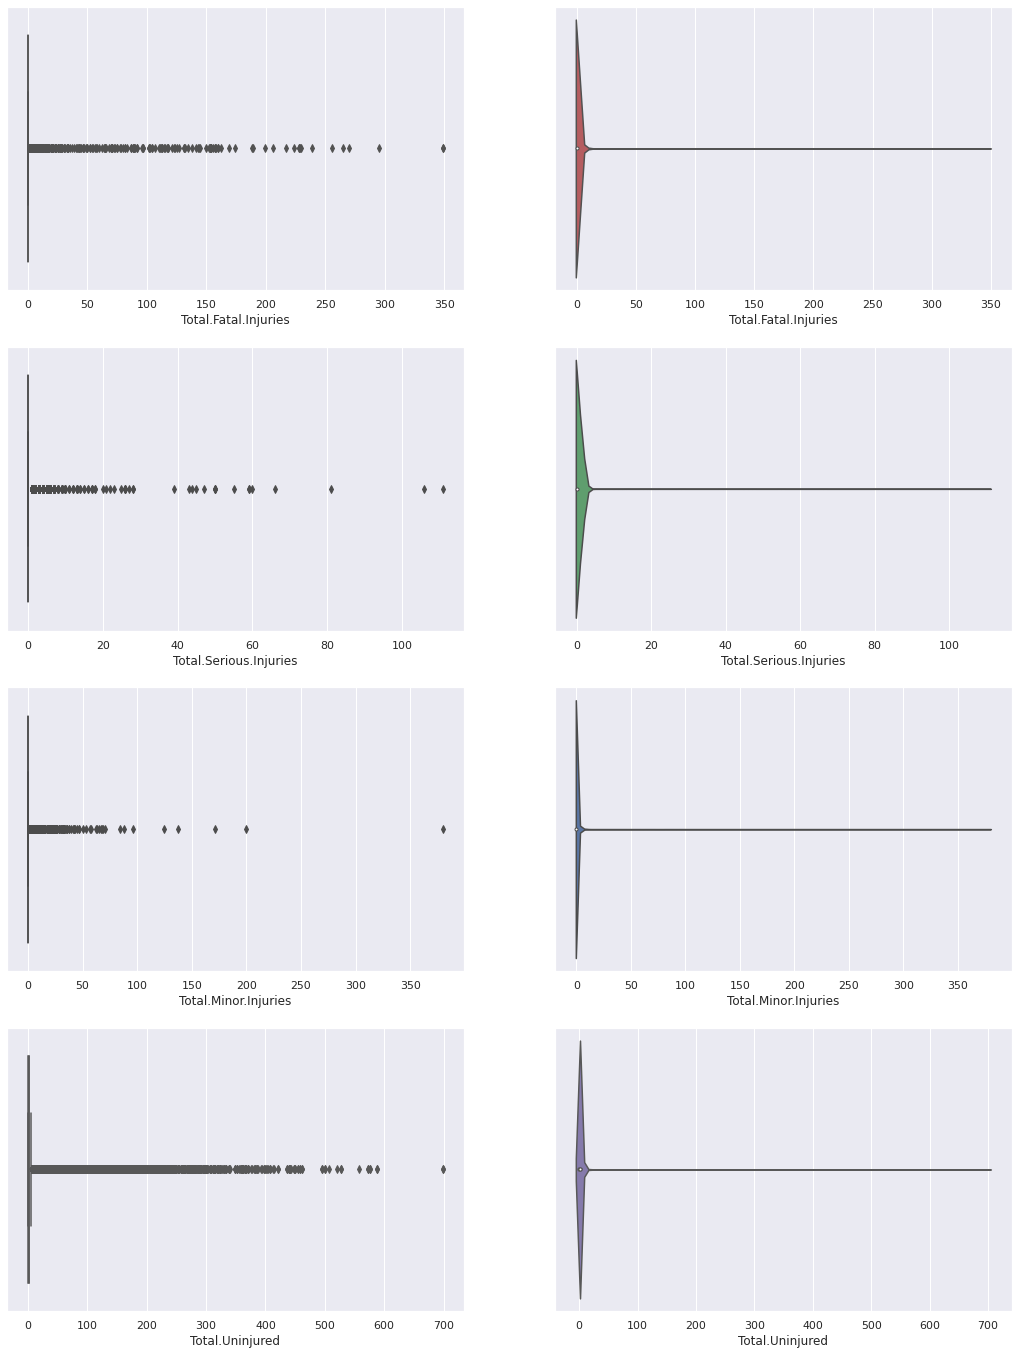

In [0]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 2, figsize=(18, 24))
colors = ["r", "g", "b", "m"]

count = 0
for var in numeric_data:
    sb.boxplot(numeric_data[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.violinplot(numeric_data[var], color = colors[count], ax = axes[count,1])
    count += 1

#### It can be seen that all the numeric variables are highly skewed toward zero.

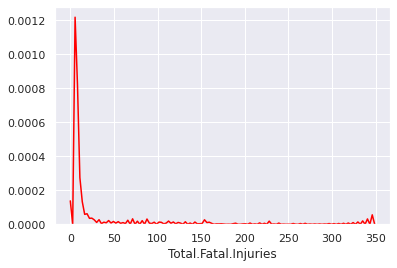

In [0]:
#A line plot to see the univariate distribution of Total.Fatal.Injuries
sb.distplot(numeric_data['Total.Fatal.Injuries'], hist = False, color = "red")

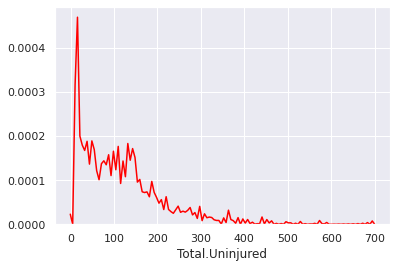

In [0]:
#A line plot to see the univariate distribution of Total.Uninjured
sb.distplot(numeric_data['Total.Uninjured'], hist = False, color = "red")

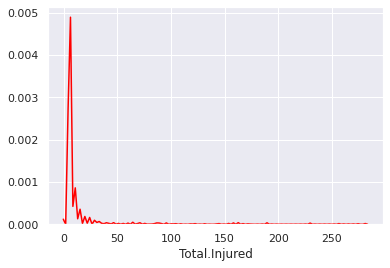

In [0]:
#A line plot to see the univariate distribution of Total.Injured
sb.distplot(aviationData['Total.Injured'], hist = False, color = "red")

## Aircraft Damage

Number of Diff Aircraft Damage : 4
Substantial    60630
Destroyed      17984
Minor           2411
Name: Aircraft.Damage, dtype: int64


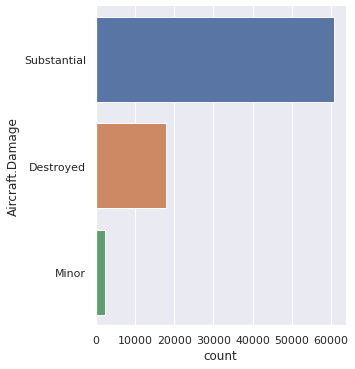

In [0]:
# Different levels of Aircraft Damage in the Dataset
print("Number of Diff Aircraft Damage :", len(RNullInjuries["Aircraft.Damage"].unique()))

# Count in each Level
print(RNullInjuries["Aircraft.Damage"].value_counts())
sb.catplot(y = "Aircraft.Damage", data = RNullInjuries, kind = "count")

**Making the dataset usable**

Converting the Injury Severity into three categories rather than having the number of fatalities in the Injury Severity resulting in a lot of different categories. 

In [0]:
k = 0
for i in aviationData['Injury.Severity']:
    if(i != 'Non-Fatal' and i != 'Incident'):
        aviationData.at[k,'Injury.Severity'] = "Fatal"
    k = k+1

In [0]:
#Aircraft.Damage against Injury.Severity
clarity_table = pd.crosstab(index=aviationData['Aircraft.Damage'], 
                          columns=aviationData['Injury.Severity'])

clarity_table

Injury.Severity  Fatal  Incident  Non-Fatal
Aircraft.Damage                            
Destroyed        12249         9       5794
Minor              124      1935        603
Substantial       4689        35      56115

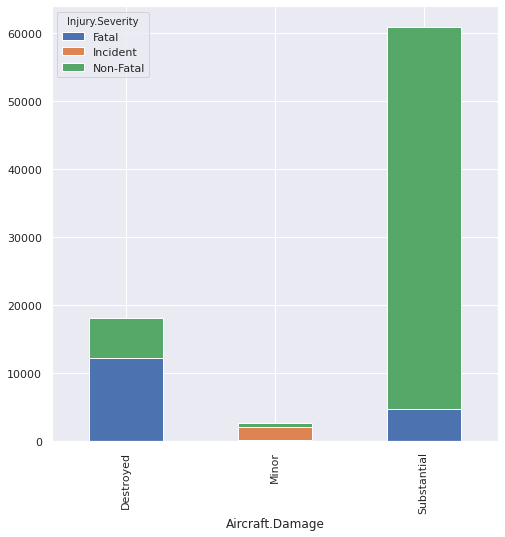

In [0]:
#Plotting
clarity_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

It can be seen that the fatality level is much higher when the Aircraft is destroyed which shows that Aircraft.Damage has an important role to play in predict the fatality level.
___________


### Scatter plot of Aircraft.Damage against Injured.Percentage

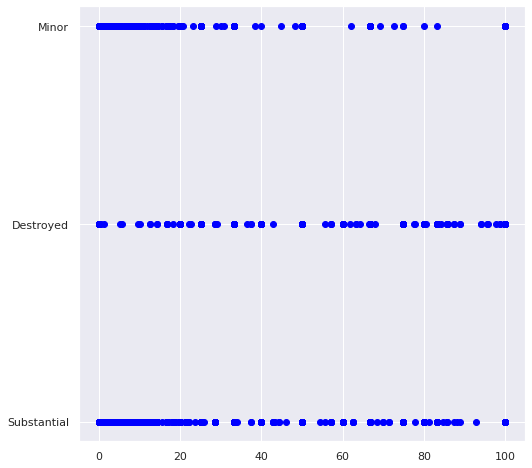

In [0]:
ACDVsInjury = pd.DataFrame(RNullInjuries.dropna(how = 'all' , subset = ["Aircraft.Damage"]))
f, axes = plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(x ="Injured.Percentage" , y ="Aircraft.Damage" , data = ACDVsInjury, color = "blue")
plt.show()

### Boxplot of Injured.Percentage against Aircraft.Damage

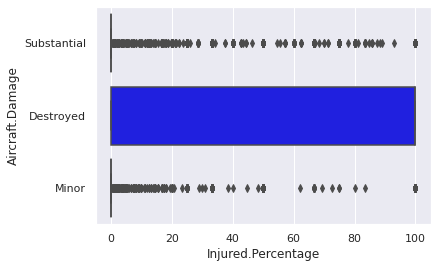

In [0]:
sb.boxplot(x ="Injured.Percentage" , y ="Aircraft.Damage" , data = ACDVsInjury, color = "blue")

### Boxplot of Death.Percentage against Aircraft.Damage

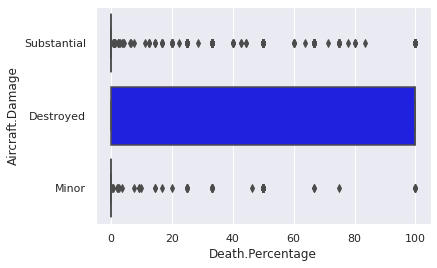

In [0]:
ACDVsInjury["Death.Percentage"] = ACDVsInjury["Total.Fatal.Injuries"] / ACDVsInjury["Total.Pass"] * 100

sb.boxplot(x ="Death.Percentage" , y ="Aircraft.Damage" , data = ACDVsInjury, color = "blue")

Changing Aircraft.Damage categorical values into numerical values to do a heatmap

Number of Diff Aircraft Damage : 3
1    60630
2    17984
0     2411
Name: Aircraft.Damage, dtype: int64


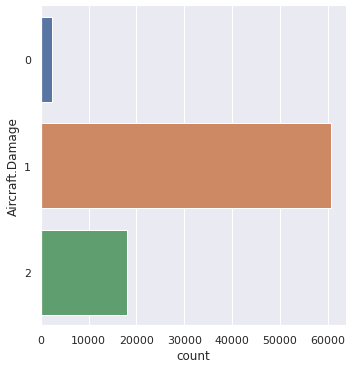

In [0]:
ACDVsInjury.loc[ACDVsInjury["Aircraft.Damage"] == "Substantial", "Aircraft.Damage"] = 1
ACDVsInjury.loc[ACDVsInjury["Aircraft.Damage"] == "Destroyed", "Aircraft.Damage"] = 2
ACDVsInjury.loc[ACDVsInjury["Aircraft.Damage"] == "Minor", "Aircraft.Damage"] = 0

print("Number of Diff Aircraft Damage :", len(ACDVsInjury["Aircraft.Damage"].unique()))

# Pokemons in each Generation
print(ACDVsInjury["Aircraft.Damage"].value_counts())
sb.catplot(y = "Aircraft.Damage", data = ACDVsInjury, kind = "count")

                    Injured.Percentage
Injured.Percentage                 1.0


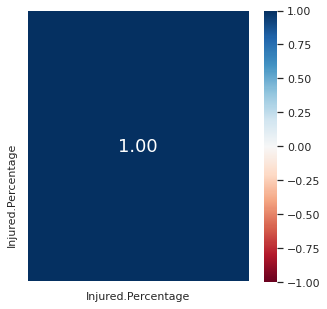

In [0]:
acdvsij = pd.DataFrame(ACDVsInjury[["Aircraft.Damage", "Injured.Percentage" ]])
print(acdvsij.corr())
f, axes = plt.subplots(1, 1, figsize=(5,5))
sb.heatmap(acdvsij.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

## Weather.Condition

Number of Diff Weather Condition : 4
1    74257
2     5840
0     3103
3     1062
Name: Weather.Condition, dtype: int64


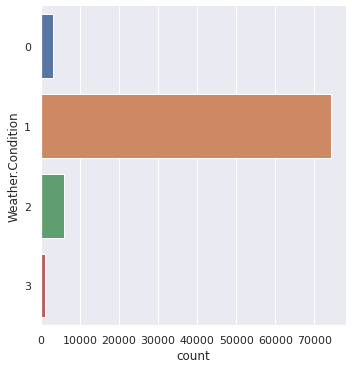

In [0]:
#Filling the Null Rows
aviationData["Total.Fatal.Injuries"].fillna(0, inplace = True)
aviationData["Weather.Condition"].fillna("Others", inplace = True)

#Assigning numbers to the different categories
aviationData.loc[aviationData["Weather.Condition"] == "VMC", "Weather.Condition"] = 1
aviationData.loc[aviationData["Weather.Condition"] == "IMC", "Weather.Condition"] = 2
aviationData.loc[aviationData["Weather.Condition"] == "UNK", "Weather.Condition"] = 3
aviationData.loc[aviationData["Weather.Condition"] == "Others", "Weather.Condition"] = 0

#Checking the number of unique weather conditions
print("Number of Diff Weather Condition :", len(aviationData["Weather.Condition"].unique()))

#Printing the count in each category
print(aviationData["Weather.Condition"].value_counts())
sb.catplot(y = "Weather.Condition", data = aviationData, kind = "count")

Inbalanced data set with weather type 1 (VMC) as the most common by far.
______

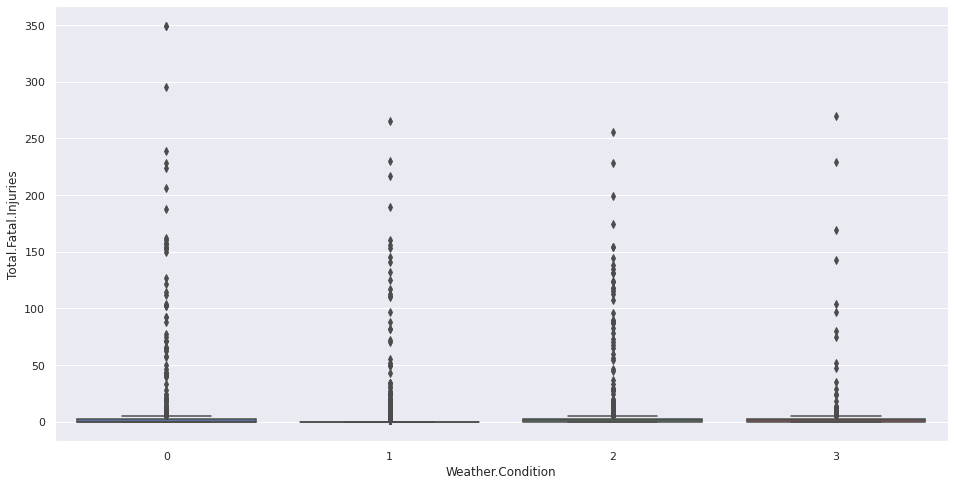

In [0]:
#Weather.Condition against Total.Fatal.Injuries
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Weather.Condition', y = 'Total.Fatal.Injuries', data = aviationData)

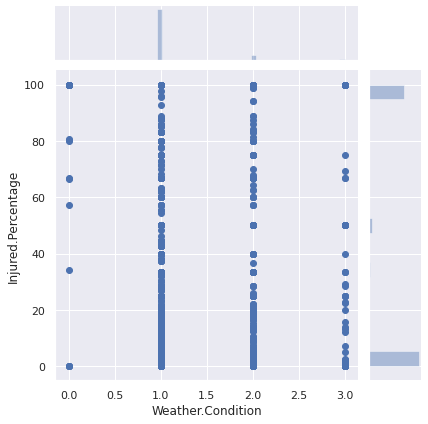

In [0]:
#Weather.Condition against Injured.Percentage
sb.jointplot( x ="Weather.Condition" , y ="Injured.Percentage" , data = aviationData)

In [0]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [0]:
aviationWeather = pd.DataFrame(aviationData['Weather.Condition'])
aviationFatalInjury = pd.DataFrame(aviationData['Total.Fatal.Injuries'])
linreg.fit(aviationWeather , aviationFatalInjury)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [0.1453502]
Coefficients 	: a =  [[0.40524334]]


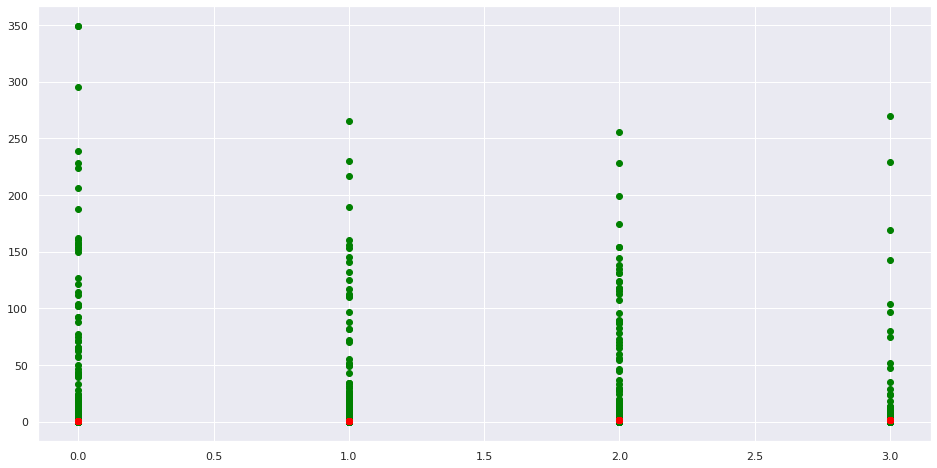

In [0]:
# Predict SalePrice values corresponding to GrLivArea
aviationFatalInjury_pred = linreg.predict(aviationWeather)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(aviationWeather, aviationFatalInjury, color = "green")
plt.scatter(aviationWeather, aviationFatalInjury_pred, color = "red")
plt.show()

In [0]:
print("Explained Variance (R^2) \t:", linreg.score(aviationWeather, aviationFatalInjury))

Explained Variance (R^2) 	: 0.0009330009904592319


## Aircraft.Category

In [0]:
#Creating a dataframe without Null Values
ACvsInjury = pd.DataFrame(RNullInjuries.dropna(how = 'all' , subset = ["Aircraft.Category"]))

ACvsInjury.drop( ACvsInjury[ACvsInjury["Aircraft.Category"] == "Unknown"].index, inplace = True)

print(ACvsInjury["Injured.Percentage"])

0          0.0
1          0.0
2          0.0
3          0.0
5          0.0
         ...  
84248      0.0
84249    100.0
84250      0.0
84251      0.0
84256      0.0
Name: Injured.Percentage, Length: 26841, dtype: float64


Number of Diff Aircraft Category : 12
Airplane             22957
Helicopter            2879
Glider                 453
Balloon                204
Weight-Shift            99
Gyrocraft               89
Powered Parachute       62
Gyroplane               59
Ultralight              32
Blimp                    4
Powered-Lift             2
Rocket                   1
Name: Aircraft.Category, dtype: int64


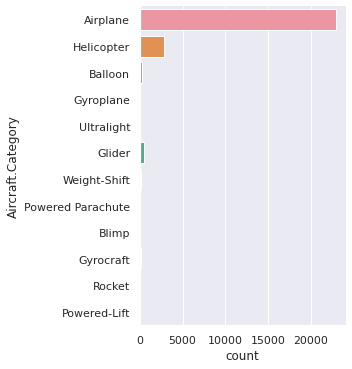

In [0]:
# Levels in the Dataset
print("Number of Diff Aircraft Category :", len(ACvsInjury["Aircraft.Category"].unique()))

# Count in each Level
print(ACvsInjury["Aircraft.Category"].value_counts())
sb.catplot(y = "Aircraft.Category", data = ACvsInjury, kind = "count")

Since the most common modes of transport are Aircrafts and Helicopters, they tended to have the most accidents as well. Among the more uncommon modes of Air Transport, Glider seems to have the most number of fatal injuries.
______

Scatterplot for Injured.Percentage against Aircraft.Category

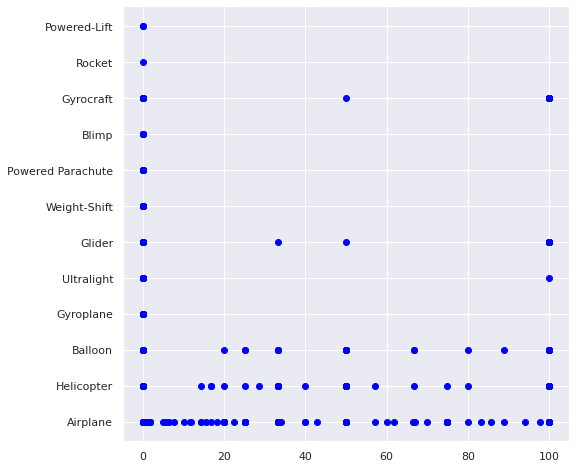

In [0]:
#sb.jointplot( x ="Injured.Percentage" , y ="Aircraft.Category" , data = ACvsInjury)
f, axes = plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(x ="Injured.Percentage" , y ="Aircraft.Category" , data = ACvsInjury, color = "blue")
plt.show()

## Air.Carrier

In [0]:
#Converting it into a categorical data-type
aviationData['Air.Carrier'] = aviationData['Air.Carrier'].astype('category')

In [0]:
#Checking the count of the different categories
aviationData['Air.Carrier'].value_counts()

UNITED AIRLINES                                49
AMERICAN AIRLINES                              41
SOUTHWEST AIRLINES CO                          31
DELTA AIR LINES INC                            28
Delta Air Lines                                27
                                               ..
MESA AIRLINES, INC.                             1
MESA AIRLINES INC. (DBA: USAIR EXPRESS)         1
MESA AIRLINES INC (DBA: US Airways Express)     1
MESA AIRLINES INC (DBA: American Eagle)         1
(DBA: 40 MILE AIR, LTD)                         1
Name: Air.Carrier, Length: 3030, dtype: int64

From the count we can conclude that the air carrier United airlines had the most number of accidents with American Airlines being a close second.

## Number.of.Engines

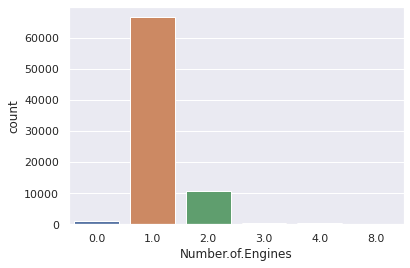

In [0]:
#Checking the different values in Number.of.Engines
sb.countplot(x = aviationData['Number.of.Engines'])

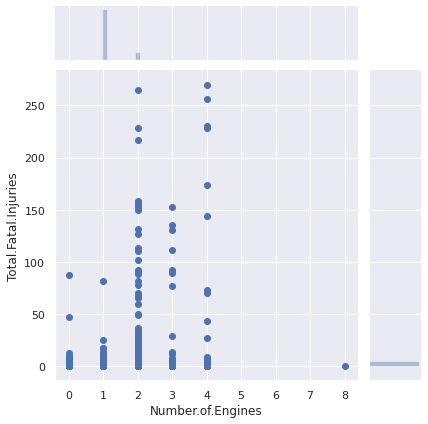

In [0]:
#Number.of.Engines vs Total.Fatal.Injuries
sb.jointplot(x = aviationData['Number.of.Engines'], y = aviationData['Total.Fatal.Injuries'])

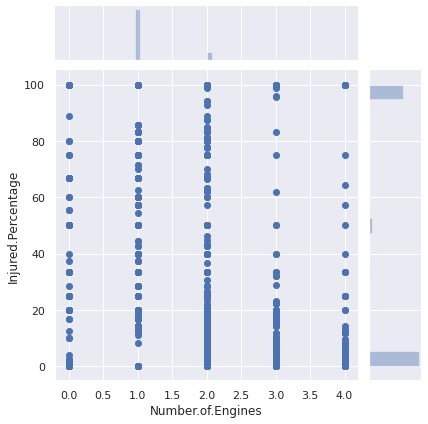

In [0]:
#Number.of.Engines vs Injuried.Percentage
sb.jointplot(x = aviationData['Number.of.Engines'], y = aviationData['Injured.Percentage'])

For the number of Engines, Aircrafts with 2 engines seem to have the most number of fatal accidents.

## Amateur.Built

In [0]:
#Dropping Null Values
AmateurVsInjury = pd.DataFrame(RNullInjuries.dropna(how = 'all' , subset = ["Amateur.Built"]))

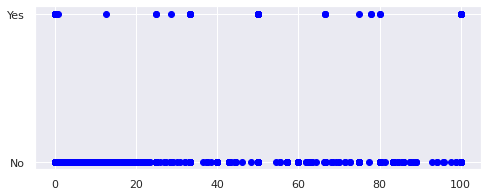

In [0]:
#Amatuer.Built vs Injured.Percentage
f, axes = plt.subplots(1, 1, figsize=(8, 3))
plt.scatter(x ="Injured.Percentage" , y ="Amateur.Built" , data = AmateurVsInjury, color = "blue")
plt.show()

Set Yes or No to 1 and 0 to do heatmap

In [0]:
AmateurVsInjury["Amateur.Built.Int"]=(AmateurVsInjury["Amateur.Built"]== "Yes" ).astype(int)

#Correlation with Injured.Percentage
AmateurVsInjury["Amateur.Built.Int"].corr(AmateurVsInjury["Injured.Percentage"])

0.05701888858741399

                    Amateur.Built.Int  Injured.Percentage
Amateur.Built.Int            1.000000            0.057019
Injured.Percentage           0.057019            1.000000


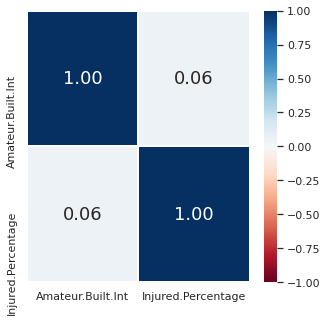

In [0]:
#Printing the correlation matrix
avsij = pd.DataFrame(AmateurVsInjury[["Amateur.Built.Int", "Injured.Percentage" ]])
print(avsij.corr())
f, axes = plt.subplots(1, 1, figsize=(5, 5))
sb.heatmap(avsij.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

The really low value value of the correlation factor, can help us conclude that the Amateur.Built has a very low contribution in the Injured.Percentage.

## Make

In [0]:
aviationData['Make'].value_counts()

CESSNA              17782
PIPER                9804
Cessna               8291
Piper                4426
BEECH                3274
                    ...  
SIEMER JAMES H          1
Ronald D. Murray        1
HOLM MICHAEL J          1
Rotary                  1
OGG RICHARD A           1
Name: Make, Length: 8022, dtype: int64

In [0]:
#Changing the Make of every entry to uppercase to avoid discrepancies
k=0
for i in aviationData['Make']:
    aviationData.at[k,'Make'] = str(i).upper()
    k = k+1
aviationData['Make'].value_counts()

CESSNA            26073
PIPER             14230
BEECH              5148
BELL               2598
BOEING             2349
                  ...  
DEITZ                 1
SIEMER JAMES H        1
SCHERER               1
HOLM MICHAEL J        1
OGG RICHARD A         1
Name: Make, Length: 7191, dtype: int64

The make CESSNA seems to have the most number of accidents. The count of the second position is less than half that of CESSNA. Hence, CESSNA had a majority of the accidents and might need to be checked on.

## Injury Severity VS Country (US or Non - US) , Weather.Condition, Broad.Phase.of.Flight

Below is the comparision between %Injury and Injury.Severity as a dependent variable. 

Convertion of 'Country' into the 2 categories also here. This is to change countries other than US into a set for comparision

In [0]:
#Creating a New DataFrame
newdata=pd.DataFrame(aviationData[["Injury.Severity","Weather.Condition","Country","Broad.Phase.of.Flight","Total.Fatal.Injuries","Total.Minor.Injuries","Total.Serious.Injuries","Total.Uninjured"]])
newdata.head(n=10)

Injury.Severity Weather.Condition  ... Total.Serious.Injuries Total.Uninjured
0        Non-Fatal                 1  ...                    NaN             1.0
1            Fatal                 1  ...                    NaN             NaN
2        Non-Fatal                 0  ...                    NaN             2.0
3        Non-Fatal                 0  ...                    NaN             1.0
4            Fatal                 0  ...                    NaN             NaN
5            Fatal                 2  ...                    2.0             NaN
6            Fatal                 1  ...                    NaN             2.0
7            Fatal                 0  ...                    NaN             NaN
8            Fatal                 0  ...                    NaN             NaN
9        Non-Fatal                 1  ...                    1.0             1.0
10           Fatal                 0  ...                    NaN             NaN
11       Non-Fatal                 0  ...                    NaN             NaN
12       Non-Fatal                 1  ...                    NaN             1.0
13       Non-Fatal                 1  ...                    NaN             1.0
14       Non-Fatal                 1  ...                    NaN             2.0
15       Non-Fatal                 0  ...                    1.0             NaN
16           Fatal                 0  ...                    NaN             NaN
17           Fatal                 0  ...                    NaN             NaN
18           Fatal                 0  ...                    NaN             NaN
19           Fatal                 0  ...                    NaN             NaN

[20 rows x 8 columns]

Firstly, remove NULL values for 'injury severity',

In [0]:
#Removing Null Values
endmainnull=newdata[newdata["Injury.Severity"]!="Unavailable"]
endmainnull.head(n=10)

Injury.Severity Weather.Condition  ... Total.Serious.Injuries Total.Uninjured
0        Non-Fatal                 1  ...                    NaN             1.0
1            Fatal                 1  ...                    NaN             NaN
2        Non-Fatal                 0  ...                    NaN             2.0
3        Non-Fatal                 0  ...                    NaN             1.0
4            Fatal                 0  ...                    NaN             NaN
5            Fatal                 2  ...                    2.0             NaN
6            Fatal                 1  ...                    NaN             2.0
7            Fatal                 0  ...                    NaN             NaN
8            Fatal                 0  ...                    NaN             NaN
9        Non-Fatal                 1  ...                    1.0             1.0
10           Fatal                 0  ...                    NaN             NaN
11       Non-Fatal                 0  ...                    NaN             NaN
12       Non-Fatal                 1  ...                    NaN             1.0
13       Non-Fatal                 1  ...                    NaN             1.0
14       Non-Fatal                 1  ...                    NaN             2.0
15       Non-Fatal                 0  ...                    1.0             NaN
16           Fatal                 0  ...                    NaN             NaN
17           Fatal                 0  ...                    NaN             NaN
18           Fatal                 0  ...                    NaN             NaN
19           Fatal                 0  ...                    NaN             NaN

[20 rows x 8 columns]

In [0]:
endmainnull.info()        ##Checking for unique categories
print("\nCheck uniques\n")
print("weather: ",len(endmainnull["Weather.Condition"].unique()))
print("\nCountry: ",len(endmainnull["Country"].unique()))
print("\nBroad B: ",len(endmainnull["Broad.Phase.of.Flight"].unique()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84262 entries, 0 to 84261
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Injury.Severity         84262 non-null  object 
 1   Weather.Condition       84262 non-null  object 
 2   Country                 83755 non-null  object 
 3   Broad.Phase.of.Flight   77654 non-null  object 
 4   Total.Fatal.Injuries    84262 non-null  float64
 5   Total.Minor.Injuries    55592 non-null  float64
 6   Total.Serious.Injuries  54384 non-null  float64
 7   Total.Uninjured         69673 non-null  float64
dtypes: float64(4), object(4)
memory usage: 5.8+ MB

Check uniques

weather:  4

Country:  180

Broad B:  13


Weather and Broad Phase seem reasonably manageable, however, there are too many categories for country.
Also, we want to remove Fatal(#) and change it to Fatal.

In [0]:
import re

#Making the data usable
gonedata=endmainnull.copy()
gonedata["Injury.Severity"] = gonedata["Injury.Severity"].apply(lambda x: re.sub(r'(Fatal)(.+)',r'\1', x))
print("Type of severity : ",len(gonedata["Injury.Severity"].unique()))
gonedata.head(10)

Type of severity :  3


Injury.Severity Weather.Condition  ... Total.Serious.Injuries Total.Uninjured
0        Non-Fatal                 1  ...                    NaN             1.0
1            Fatal                 1  ...                    NaN             NaN
2        Non-Fatal                 0  ...                    NaN             2.0
3        Non-Fatal                 0  ...                    NaN             1.0
4            Fatal                 0  ...                    NaN             NaN
5            Fatal                 2  ...                    2.0             NaN
6            Fatal                 1  ...                    NaN             2.0
7            Fatal                 0  ...                    NaN             NaN
8            Fatal                 0  ...                    NaN             NaN
9        Non-Fatal                 1  ...                    1.0             1.0
10           Fatal                 0  ...                    NaN             NaN
11       Non-Fatal                 0  ...                    NaN             NaN
12       Non-Fatal                 1  ...                    NaN             1.0
13       Non-Fatal                 1  ...                    NaN             1.0
14       Non-Fatal                 1  ...                    NaN             2.0
15       Non-Fatal                 0  ...                    1.0             NaN
16           Fatal                 0  ...                    NaN             NaN
17           Fatal                 0  ...                    NaN             NaN
18           Fatal                 0  ...                    NaN             NaN
19           Fatal                 0  ...                    NaN             NaN

[20 rows x 8 columns]

Converting the data into US and Non-US

In [0]:
country = gonedata[gonedata["Country"].isnull() == False]
country.info()
print("\n")
print(country["Country"].dropna().value_counts())

countryroads=country.copy()
countryroads["Country"] = countryroads["Country"].apply(lambda x: re.sub(r'^United.States$',r'US', x))
countryroads.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83755 entries, 0 to 84261
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Injury.Severity         83755 non-null  object 
 1   Weather.Condition       83755 non-null  object 
 2   Country                 83755 non-null  object 
 3   Broad.Phase.of.Flight   77165 non-null  object 
 4   Total.Fatal.Injuries    83755 non-null  float64
 5   Total.Minor.Injuries    55113 non-null  float64
 6   Total.Serious.Injuries  53902 non-null  float64
 7   Total.Uninjured         69182 non-null  float64
dtypes: float64(4), object(4)
memory usage: 5.8+ MB


United States     78849
Canada              308
Brazil              291
Mexico              269
United Kingdom      262
                  ...  
Mauritania            1
Comoros               1
Burma                 1
Benin                 1
St Lucia              1
Name: Country, Length: 179, dtype: int64


Injury.Severity Weather.Condition  ... Total.Serious.Injuries Total.Uninjured
0       Non-Fatal                 1  ...                    NaN             1.0
1           Fatal                 1  ...                    NaN             NaN
2       Non-Fatal                 0  ...                    NaN             2.0
3       Non-Fatal                 0  ...                    NaN             1.0
4           Fatal                 0  ...                    NaN             NaN

[5 rows x 8 columns]

In [0]:
print(countryroads["Country"].dropna().value_counts())

US                78849
Canada              308
Brazil              291
Mexico              269
United Kingdom      262
                  ...  
Eritrea               1
Laos                  1
Nauru                 1
Anguilla              1
Vanuatu               1
Name: Country, Length: 179, dtype: int64


In [0]:
countryroads["Country"] = countryroads["Country"].apply(lambda x: re.sub(r'^((?!US).)*$',r'OoU', x))
countryroads.head()
print(countryroads["Country"].dropna().value_counts())

US     78849
OoU     4906
Name: Country, dtype: int64


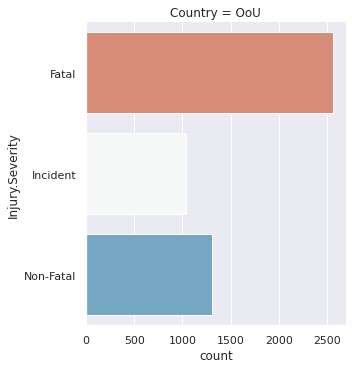

In [0]:
countryUS=countryroads[countryroads["Country"]!="US"]
sb.catplot(y = 'Injury.Severity', data = countryUS, col = 'Country', kind = 'count',palette='RdBu')

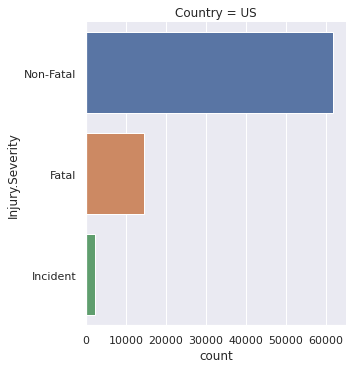

In [0]:
countryUS=countryroads[countryroads["Country"]=="US"]
sb.catplot(y = 'Injury.Severity', data = countryUS, col = 'Country', kind = 'count')

Here, we are able to observe something interesting. Although the database mainly consists of data from the United States, a majority of the accidents in the United States remained Non-Fatal and a small percentage were Fatal. This is not the case for countries outside the US. The number of Fatal Accidents were more than that of Non-Fatal cases.

In [0]:
countryroads["Total.Injured"] = countryroads["Total.Fatal.Injuries"] + countryroads["Total.Serious.Injuries"] + countryroads["Total.Minor.Injuries"]
countryroads["Total.Pass"] = countryroads["Total.Injured"] + countryroads["Total.Uninjured"]
countryroads["Injured.Percentage"] = countryroads["Total.Injured"] / countryroads["Total.Pass"] * 100

countryroadpercent = pd.DataFrame(countryroads.dropna(how='all' , subset = ["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"]))

countryroadpercent["Total.Fatal.Injuries"].fillna(0, inplace = True)
countryroadpercent["Total.Serious.Injuries"].fillna(0, inplace = True)
countryroadpercent["Total.Minor.Injuries"].fillna(0, inplace = True)
countryroadpercent["Total.Uninjured"].fillna(0, inplace = True)
countryroadpercent["Total.Pass"].fillna(0, inplace = True)
countryroadpercent["Total.Injured"].fillna(0, inplace = True)
countryroadpercent["Injured.Percentage"].fillna(0, inplace = True)

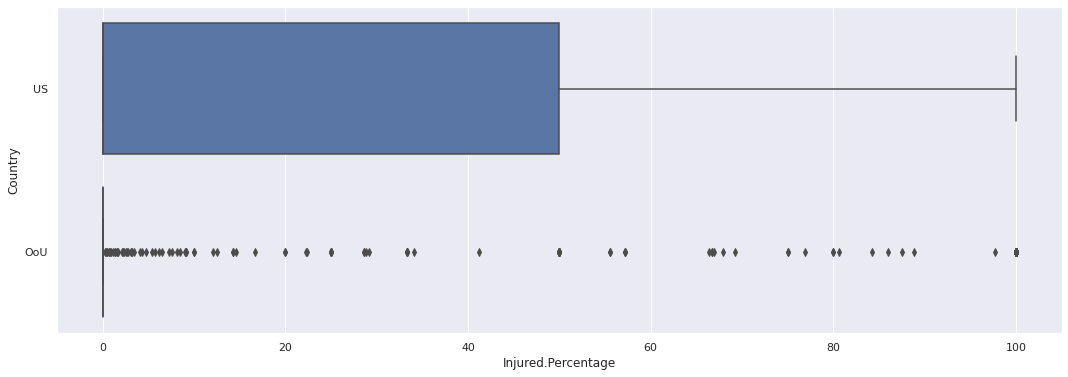

In [0]:
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "Injured.Percentage", y = "Country", data = countryroadpercent, orient = "h")

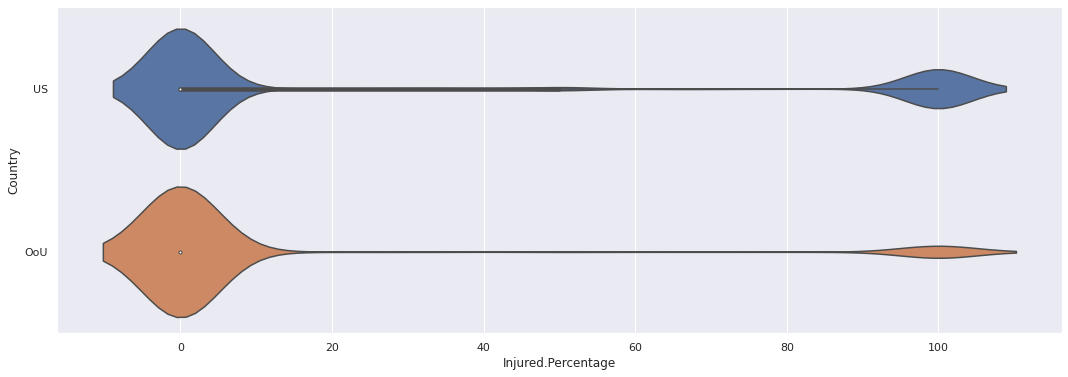

In [0]:
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.violinplot(x = "Injured.Percentage", y = "Country", data = countryroadpercent, orient = "h")

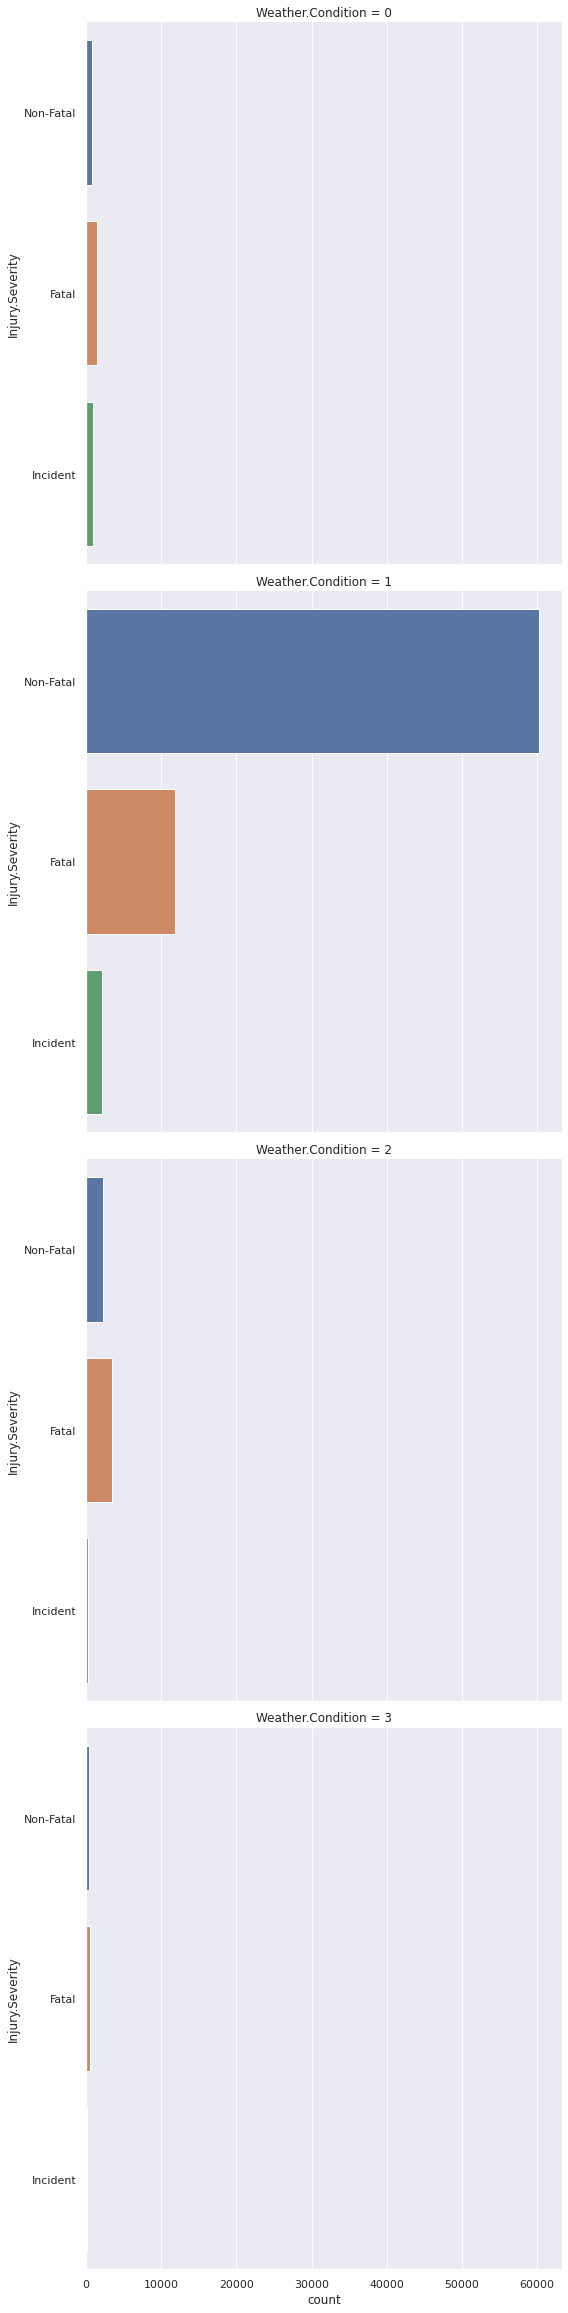

In [0]:
sb.catplot(y = 'Injury.Severity', data = gonedata, col = 'Weather.Condition', kind = 'count', col_wrap = 1, height = 8)

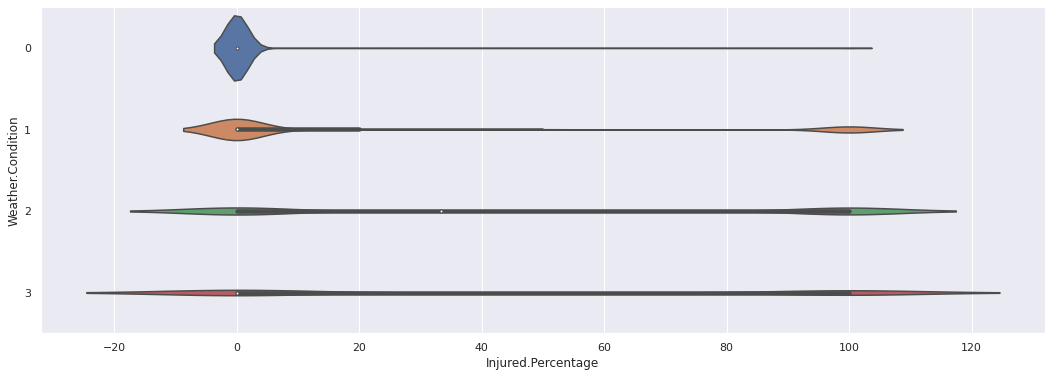

In [0]:
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.violinplot(x = "Injured.Percentage", y = "Weather.Condition", data = countryroadpercent, orient = "h")

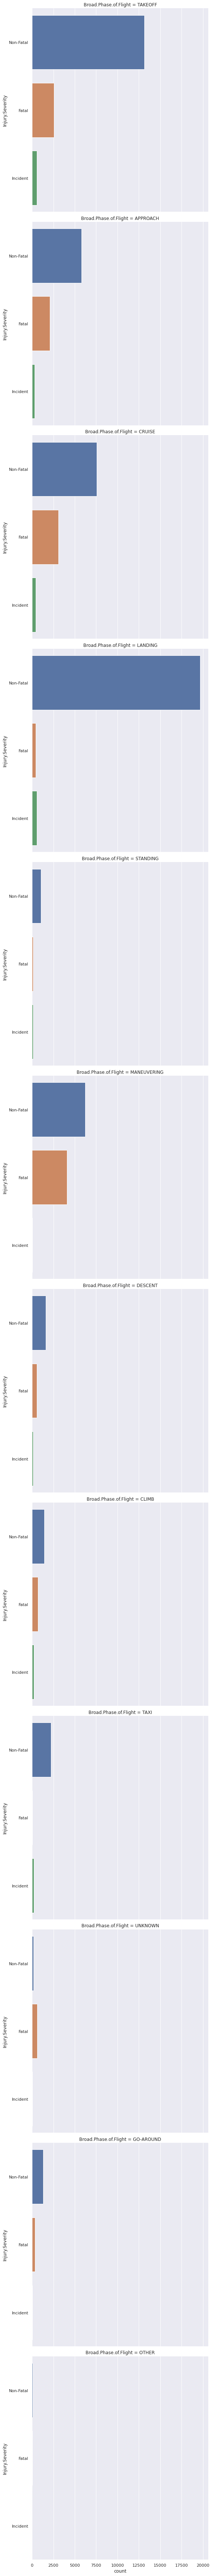

In [0]:
sb.catplot(y = 'Injury.Severity', data = gonedata, col = 'Broad.Phase.of.Flight', kind = 'count', col_wrap = 1, height = 8)

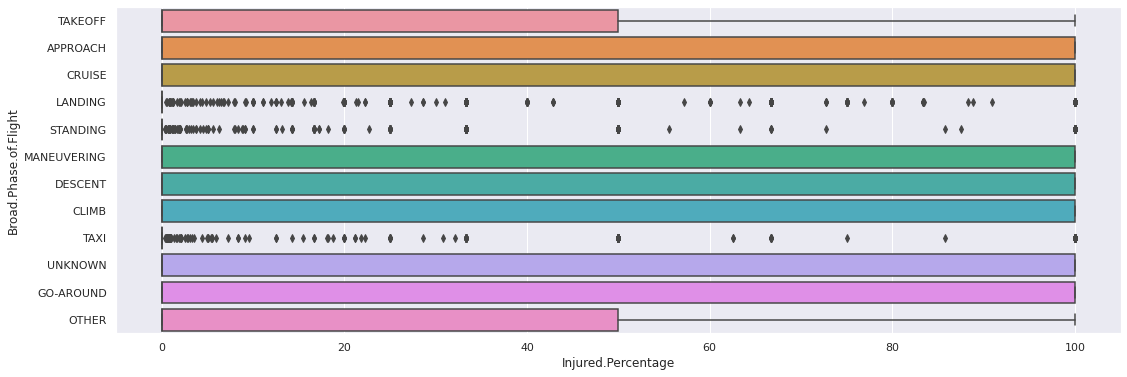

In [0]:
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "Injured.Percentage", y = "Broad.Phase.of.Flight", data = countryroadpercent, orient = "h")

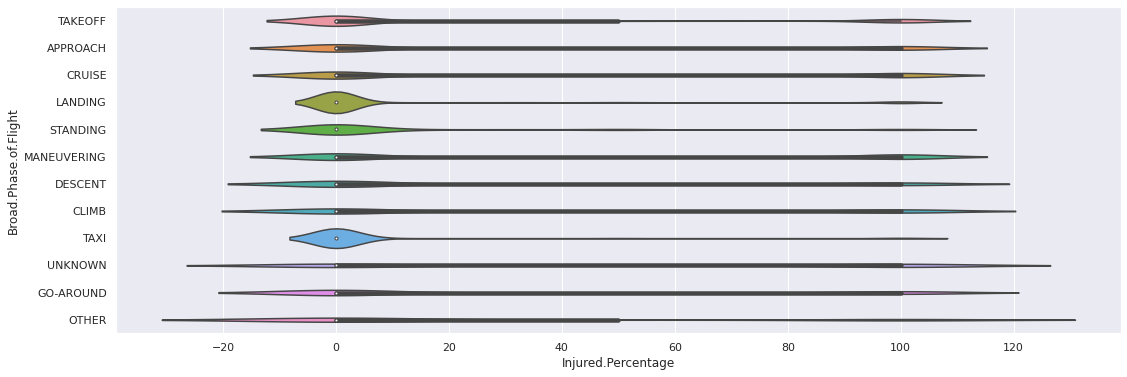

In [0]:
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.violinplot(x = "Injured.Percentage", y = "Broad.Phase.of.Flight", data = countryroadpercent, orient = "h")

## Making a Map to Visualize

### Attempt 1 - Using the map as a png file

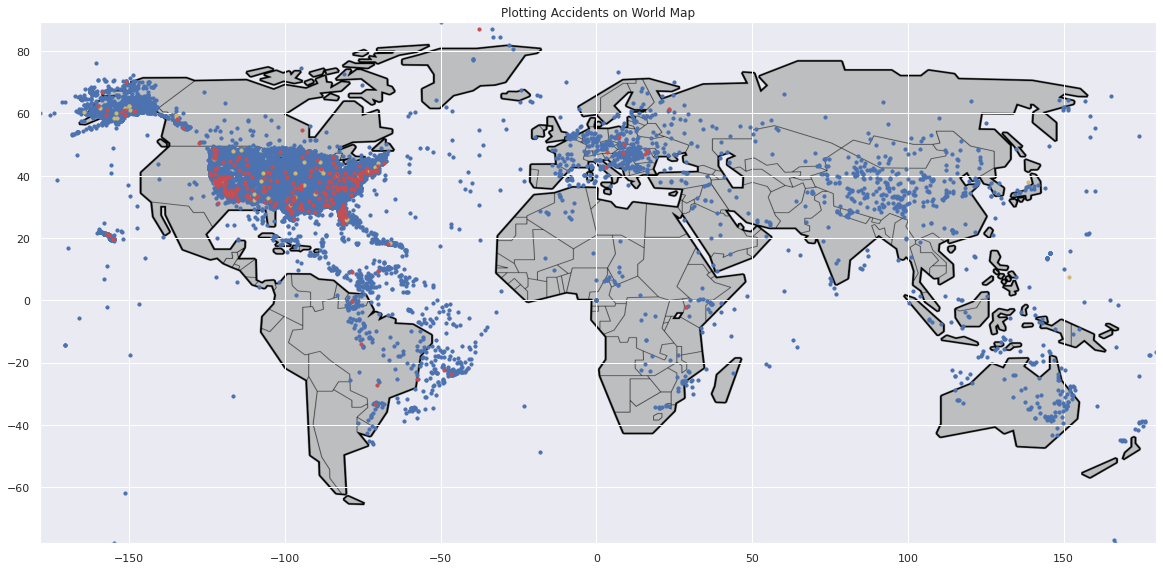

In [0]:
RNullInjuries = pd.DataFrame(aviationData.dropna(how='all' , subset = ["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"]))

RNullInjuries["Total.Injured"] = RNullInjuries["Total.Fatal.Injuries"] + RNullInjuries["Total.Serious.Injuries"] + RNullInjuries["Total.Minor.Injuries"]
RNullInjuries["Total.Pass"] = RNullInjuries["Total.Injured"] + RNullInjuries["Total.Uninjured"]
RNullInjuries["Injured.Percentage"] = RNullInjuries["Total.Injured"] / RNullInjuries["Total.Pass"] * 100

RNullInjuries["Total.Pass"].fillna(0, inplace = True)
RNullInjuries["Total.Injured"].fillna(0, inplace = True)
RNullInjuries["Injured.Percentage"].fillna(0, inplace = True)

bluep = pd.DataFrame(RNullInjuries)
bluep.drop(bluep[bluep['Injured.Percentage'] > 33].index, inplace = True)

orangep = pd.DataFrame(RNullInjuries)
orangep.drop(orangep[orangep['Injured.Percentage'] < 33].index, inplace = True)
orangep.drop(orangep[orangep['Injured.Percentage'] > 66].index, inplace = True)

redp = pd.DataFrame(RNullInjuries)
redp.drop(redp[redp['Injured.Percentage'] < 66].index, inplace = True)

map_sg = plt.imread('world_map.png')

BBox = ((RNullInjuries.Longitude.min(),  RNullInjuries.Longitude.max(),      
         RNullInjuries.Latitude.min(), RNullInjuries.Latitude.max()))
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(bluep.Longitude, bluep.Latitude, zorder=1, alpha= 1, c='b', s=10)
ax.scatter(orangep.Longitude, orangep.Latitude, zorder=1, alpha= 1, c='y', s=10)
ax.scatter(redp.Longitude, redp.Latitude, zorder=1, alpha= 1, c='r', s=10)
ax.set_title('Plotting Accidents on World Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map_sg, zorder=0, extent = BBox, aspect= 'equal') 


brown : 2010 to 2019
grey : 2000 to 2010
purple : 1990 to 2000
blue : 1981 to 1990
green : 1974 to 1979
yellow : 1962 to 1962
orange : nan to nan
red : 1948 to 1948


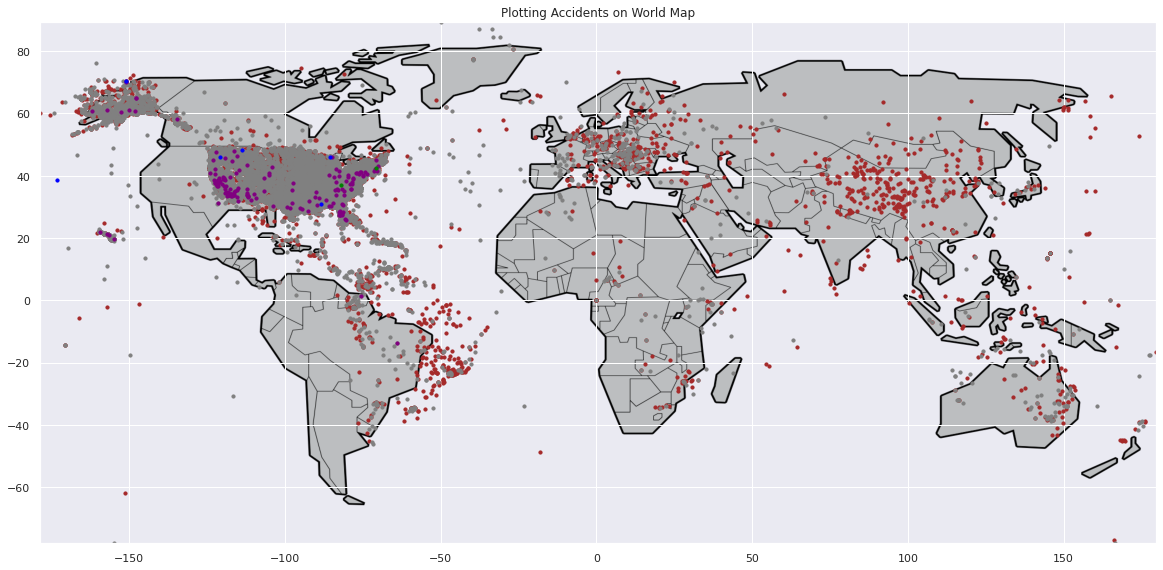

In [0]:
RNullInjuries = pd.DataFrame(aviationData.dropna(how='all' , subset = ["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"]))

RNullInjuries['Event.Date'] = pd.to_datetime(RNullInjuries['Event.Date'])
RNullInjuries["TheYear"] = RNullInjuries["Event.Date"].dt.year

listOfScatter = []
minYr = RNullInjuries["TheYear"].min()
maxYr = RNullInjuries["TheYear"].max()

countYr = 1950
prevYear = 0

for i in range(8):
    
    toscatter = pd.DataFrame(RNullInjuries)
        
    if( i == 0 ):
        toscatter.drop(toscatter[toscatter["TheYear"] > countYr].index, inplace = True)
    else:
        toscatter.drop(toscatter[toscatter["TheYear"] < prevYear].index, inplace = True)
        toscatter.drop(toscatter[toscatter["TheYear"] > countYr].index, inplace = True)
    
    prevYear = countYr
    countYr += 10
    listOfScatter.append(toscatter)
    
coList = ['red','orange','yellow','green','blue','purple','grey','brown']

map_sg = plt.imread('world_map.png')

BBox = ((RNullInjuries.Longitude.min(),  RNullInjuries.Longitude.max(),      
         RNullInjuries.Latitude.min(), RNullInjuries.Latitude.max()))
fig, ax = plt.subplots(figsize = (20,20))
for each in range(7,-1,-1):
    ax.scatter(listOfScatter[each].Longitude, listOfScatter[each].Latitude, zorder=1, alpha= 1, c=coList[each], s=10)
    print(coList[each] + " : " + str(listOfScatter[each]["TheYear"].min()) + " to " + str(listOfScatter[each]["TheYear"].max()))
ax.set_title('Plotting Accidents on World Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map_sg, zorder=0, extent = BBox, aspect= 'equal')


### Attempt 2 - Map using Geopandas

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
!pip install geopandas
import geopandas as gpd
!pip install descartes
import descartes
from shapely.geometry import Point, Polygon

     |████████████████████████████████| 931kB 2.7MB/s 
     |████████████████████████████████| 10.4MB 48.4MB/s 
     |████████████████████████████████| 14.7MB 309kB/s 


In [0]:
#Converting the latitude and longitude data into a geometry point for geopandas
geometry = [Point(xy) for xy in zip(aviationData['Longitude'],aviationData['Latitude'])]
geometry[:3]

In [0]:
crs = {'init':'epsg:4326'}

In [0]:
#Creating a geopandas dataframe
geo_df = gpd.GeoDataFrame(aviationData, crs = crs, geometry = geometry)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [0]:
#Reading the world-map using an shp file
fp = "ne_50m_admin_0_countries.shp"
the_map = gpd.read_file(fp)

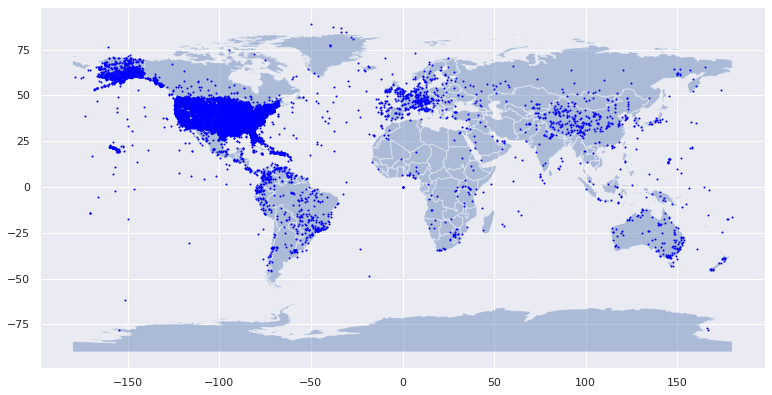

In [0]:
#Plotting the points on a map
fig,ax = plt.subplots(figsize = (13,15))
the_map.plot(ax = ax, alpha = 0.4)
geo_df.plot(ax = ax, color = 'blue', markersize = 1, label = 'Accident Location')

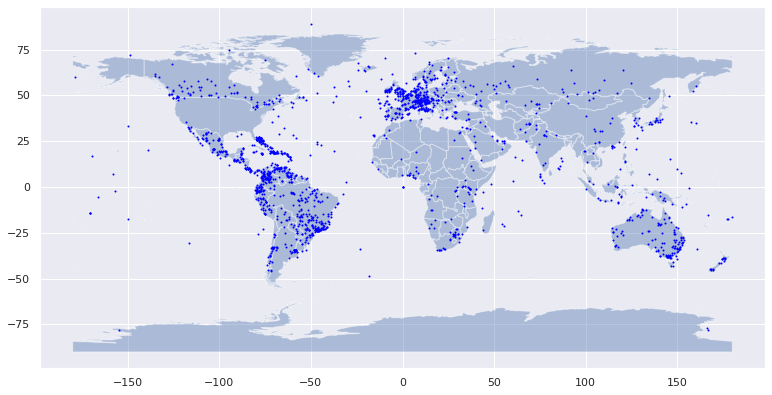

In [0]:
#Non-US countries
fig,ax = plt.subplots(figsize = (13,15))
the_map.plot(ax = ax, alpha = 0.4)
geo_df[geo_df['Country']!='United States'].plot(ax = ax, color = 'blue', markersize = 1, label = 'Accident Location')

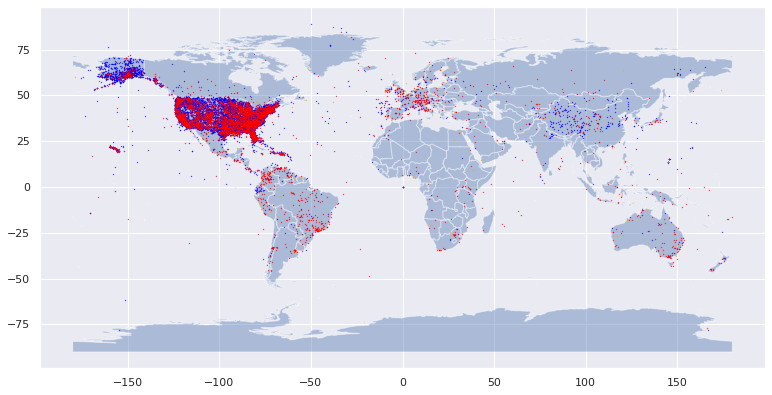

In [0]:
#Injury.Severity and location of Accident
fig,ax = plt.subplots(figsize = (13,15))
the_map.plot(ax = ax, alpha = 0.4)
geo_df[geo_df['Injury.Severity'] == 'Non-Fatal'].plot(ax = ax, color = 'blue', markersize = 0.1)
geo_df[geo_df['Injury.Severity'] == 'Incident'].plot(ax = ax, color = 'orange', markersize = 0.1)
geo_df[geo_df['Injury.Severity'] == 'Fatal'].plot(ax = ax, color = 'red', markersize = 0.1)

Plotting on the US Map due to the huge amount of data pertaining to the United States

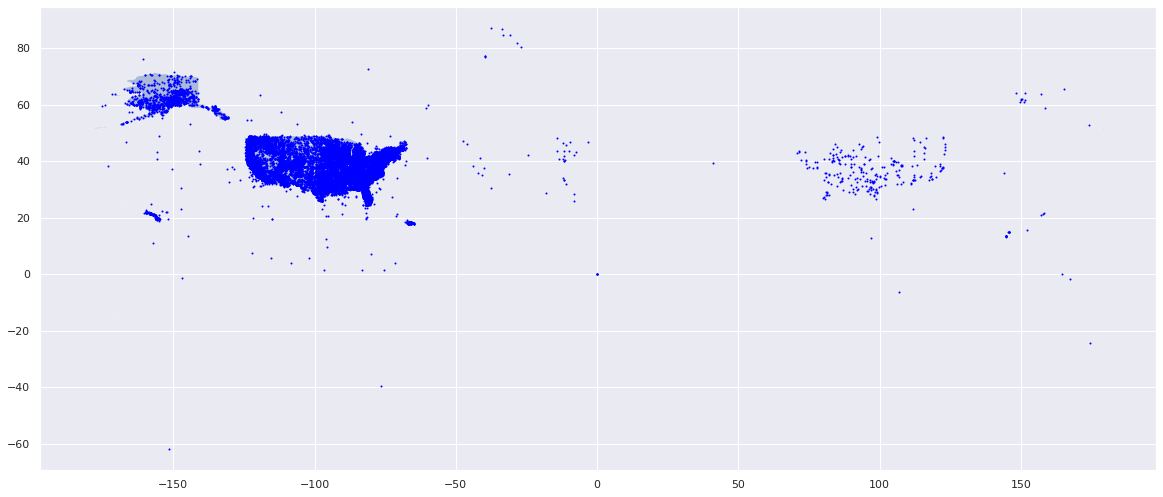

In [0]:
fp = "tl_2017_us_state.shp"
us_map = gpd.read_file(fp)
fig,ax = plt.subplots(figsize = (20,25))
us_map.plot(ax = ax, alpha = 0.4)
geo_df[geo_df['Country']=='United States'].plot(ax = ax, color = 'blue', markersize = 1, label = 'Accident Location')

After plotting the data, we can see again, that most of these accidents crowd in the United States, hence we need to compare the number of the accidents in the countries outside the US.

### Attempting to make a Choropleth to compare the number of Accidents in the different Countries

Creating a new dataframe from the value counts

In [0]:
value_counts = aviationData['Country'].value_counts(dropna=True, sort=True)
df_val_counts = pd.DataFrame(value_counts)
df_val_counts = df_val_counts.reset_index()
df_val_counts.columns = ['Country', 'counts']
df_val_counts.head()

Country  counts
0   United States   78849
1          Canada     308
2          Brazil     291
3          Mexico     269
4  United Kingdom     262

In [0]:
#Obtaining the Country Code from a dataset obtained from Kaggle
code = pd.read_csv('countries_codes_and_coordinates.csv')

In [0]:
code.head()

Country Alpha-2 code  ... Latitude (average) Longitude (average)
0     Afghanistan         "AF"  ...               "33"                "65"
1         Albania         "AL"  ...               "41"                "20"
2         Algeria         "DZ"  ...               "28"                 "3"
3  American Samoa         "AS"  ...         "-14.3333"              "-170"
4         Andorra         "AD"  ...             "42.5"               "1.6"

[5 rows x 6 columns]

In [0]:
#Extracting the necessary coulmns
code = code[['Country', 'Alpha-3 code']]

In [0]:
code.head()

Country Alpha-3 code
0     Afghanistan        "AFG"
1         Albania        "ALB"
2         Algeria        "DZA"
3  American Samoa        "ASM"
4         Andorra        "AND"

In [0]:
#Converting theh code into the required format
i = 0;
for k in code['Alpha-3 code']:
  code.at[i,'Alpha-3 code'] = k[2:5]
  i = i+1;
code.head()

Country Alpha-3 code
0     Afghanistan          AFG
1         Albania          ALB
2         Algeria          DZA
3  American Samoa          ASM
4         Andorra          AND

In [0]:
merged = df_val_counts.merge(code, left_on='Country', right_on='Country')
merged.describe()

counts
count    161.000000
mean     519.403727
std     6212.079528
min        1.000000
25%        3.000000
50%        7.000000
75%       27.000000
max    78849.000000

In [0]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 160
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       161 non-null    object
 1   counts        161 non-null    int64 
 2   Alpha-3 code  161 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.0+ KB


In [0]:
#Converting the shp file into a geopandas dataframe and extracting the necessary columns
gdf = gpd.read_file('ne_50m_admin_0_countries.shp')[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
gdf.sample(5)

ADM0_A3                                           geometry
180     DJI  POLYGON ((4061432.888 1229926.205, 4053825.851...
65      SRB  POLYGON ((1810433.160 4786843.651, 1824653.790...
11      MNP  MULTIPOLYGON (((13549368.599 2006682.579, 1354...
1       ZMB  POLYGON ((2840442.176 -1673055.381, 2826852.35...
86      PAK  POLYGON ((6818531.214 3814012.993, 6825159.655...

In [0]:
#Merging the two dataframes
merged = gdf.merge(merged, left_on='ADM0_A3', right_on='Alpha-3 code')
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ADM0_A3       156 non-null    object  
 1   geometry      156 non-null    geometry
 2   Country       156 non-null    object  
 3   counts        156 non-null    int64   
 4   Alpha-3 code  156 non-null    object  
dtypes: geometry(1), int64(1), object(3)
memory usage: 7.3+ KB


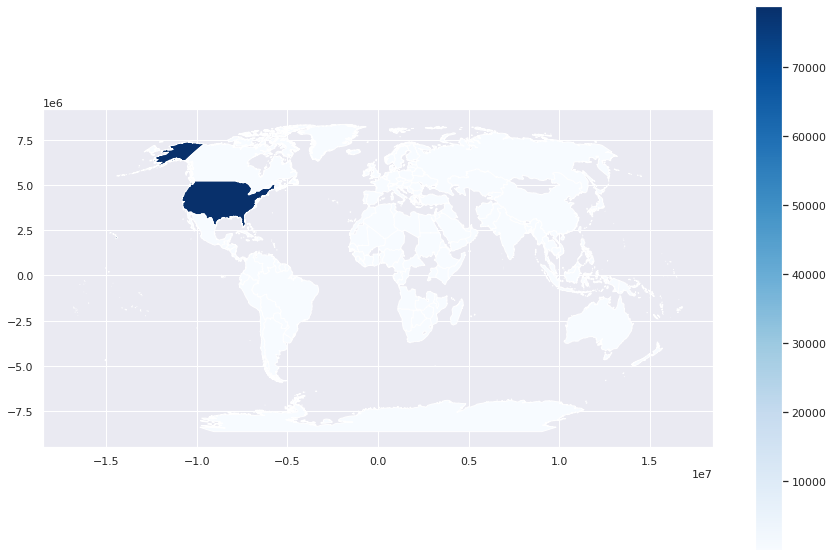

In [0]:
ax = merged.dropna().plot(column='counts', cmap='Blues', figsize=(15,10), k=9, legend=True)

Here, we see that the choropleth diagram has a huge dark blue region across the United States but the rest of the World is nearly close to White. This is because a huge amount of the data in the Database pertains to United States which might lead to the conclusion that United States has much more accidents than the rest of the world which is probably not true. This is only because the database mainly has US related data.

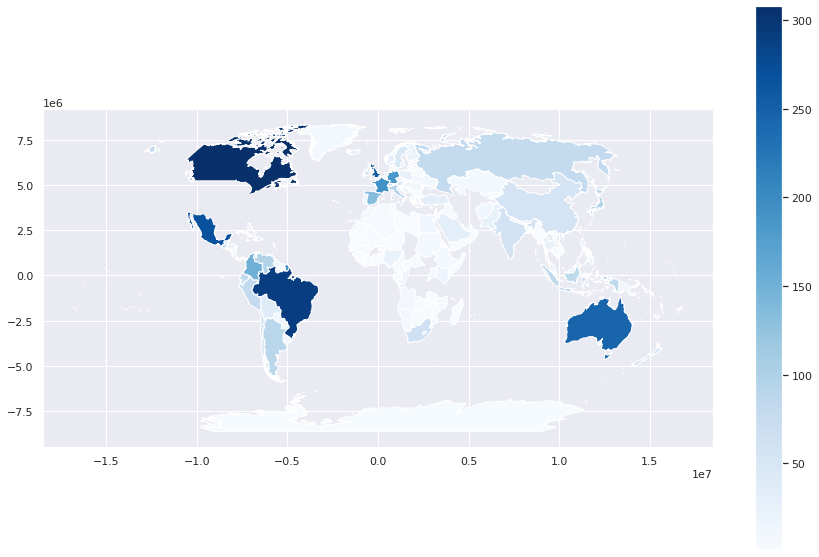

In [0]:
#Plotting for the Non-US Countries
merged = merged[merged['Country']!='United States']
fig,ax = plt.subplots(figsize = (15,10))
merged.plot(ax = ax, column='counts', cmap='Blues', k=9, legend=True)

After removing the data related to United States, we are able to see the actual comparison among countries outside the United States and the relative count of the accidents. This helps us come to the conclusion that Canada, Brazil, Mexic0, United Kingdom and Australia had the most Aviation related accidents outside the United States.

We also observe that some of the countries have not been displayed and the map looks broken at some places. This is probably because we do not have data pertaining to that country's aviation accident and hence those fields were removed from the geoframe that was created using the shapefile.

## Time Series

In [0]:
#Extracting the Event.Year from Event.Date
k=0
for i in aviationData['Event.Date']:
    aviationData.at[k,'Event.Year'] = str(i)[0:4]
    k = k+1 

In [0]:
aviationData['Event.Year']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
84257    1979
84258    1977
84259    1974
84260    1962
84261    1948
Name: Event.Year, Length: 84262, dtype: object

Plotting a bar graph of Injury Count and Event.Year

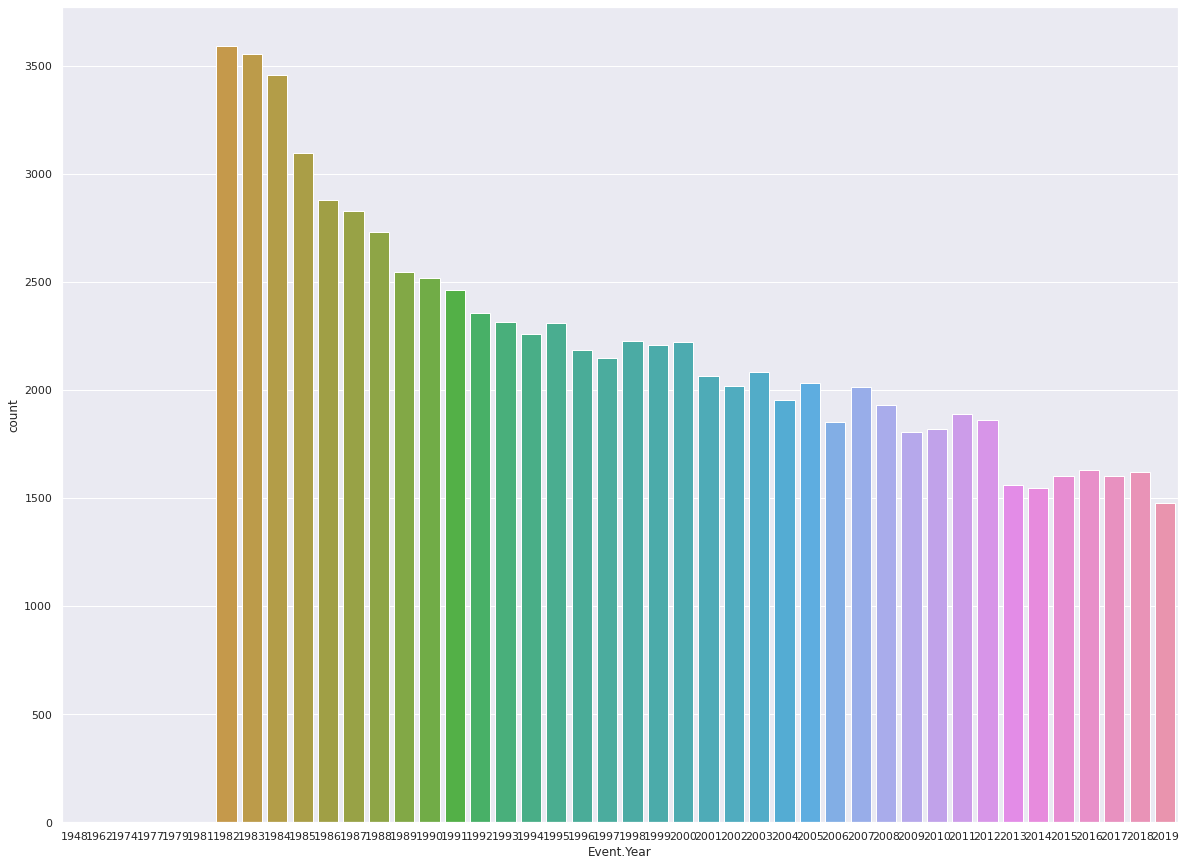

In [0]:
f, axes = plt.subplots(1, 1, figsize=(20, 15))
sb.countplot(x = aviationData['Event.Year'])

Converting the Years to Decades

In [0]:
k = 0 
for i in aviationData['Event.Year']:
    a = int(i)
    if(a<1950):
        aviationData.at[k,'Decade'] = '1940s'
    elif(a<1960):
        aviationData.at[k,'Decade'] = '1950s'
    elif(a<1970):
        aviationData.at[k,'Decade'] = '1960s'
    elif(a<1980):
        aviationData.at[k,'Decade'] = '1970s'
    elif(a<1990):
        aviationData.at[k,'Decade'] = '1980s'
    elif(a<2000):
        aviationData.at[k,'Decade'] = '1990s'
    elif(a<2010):
        aviationData.at[k,'Decade'] = '2000s'
    elif(a<2020):
        aviationData.at[k,'Decade'] = '2010s'
    k = k+1

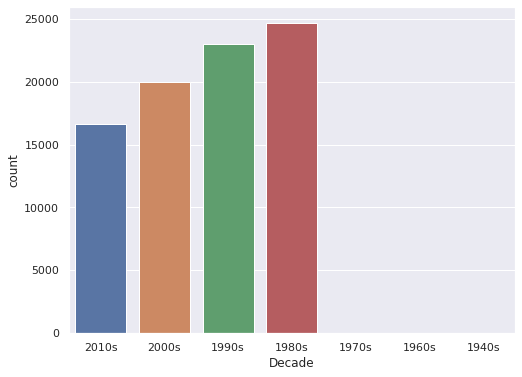

In [0]:
f, axes = plt.subplots(1, 1, figsize=(8, 6))
sb.countplot(x = aviationData['Decade'])

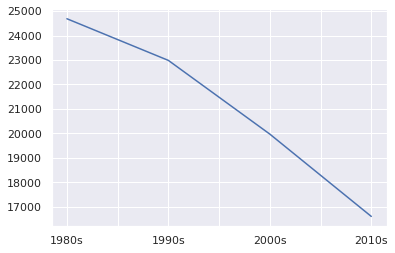

In [0]:
#Line Graph
decade = aviationData[aviationData['Event.Year']>'1979']
decade['Decade'].value_counts().plot(kind="line")
plt.show()

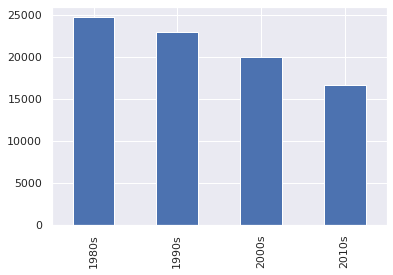

In [0]:
decade = aviationData[aviationData['Event.Year']>'1979']
decade['Decade'].value_counts().plot(kind="bar")
plt.show()

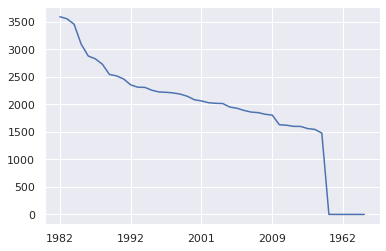

In [0]:
aviationData['Event.Year'].value_counts().plot(kind = "line")
plt.show()

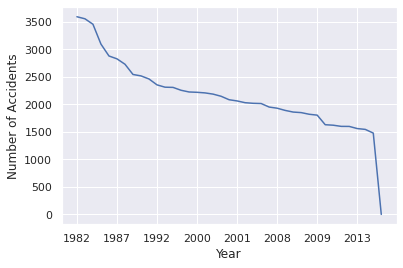

In [0]:
year = aviationData[aviationData['Event.Year']>'1979']
year['Event.Year'].value_counts().plot(kind = "line")
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

Through these time series, we can see clearly that the number of accidents have reduced over time. It is a constant decrease from the 1970s up until now. 
Also, it might be misleading that the years before 1979 did not have much accidents. This is because one of the two following reasons. Either, the database does not contain much information about accidents in those years and hence has a very low count; or; Aviation travel was still a new concept back then and hence even with the low count of accidents, the percent of Aviation accidents in the total number of Aviation Travels was still high.

The consistent decrease in the number of accidents can be attributed to the fact that the technology has constantly evolved and become better to ensure a better safety of the passengers.

## Clustering

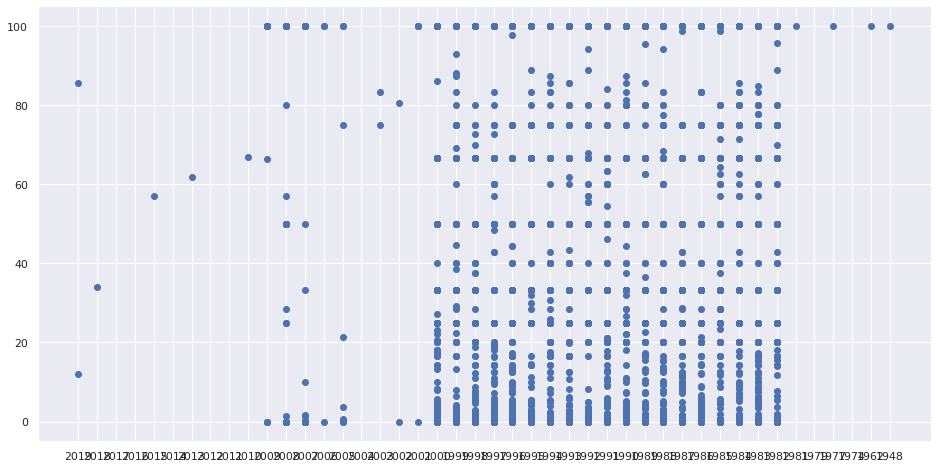

In [0]:
# Extract the Features from the Data
X = pd.DataFrame(aviationData[["Event.Year", "Injured.Percentage"]])

# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Event.Year", y = "Injured.Percentage", data = X)

In [0]:
#Removing Null Values
X.dropna(axis = 0, how = 'any',inplace = True)

In [0]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Guess the Number of Clusters
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Print the Cluster Centers
print("Features", "\tYear", "\tInjured.Percentage")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t ")
    for coord in center:
        print(round(coord, 2), end="\t ")
    print()

Features 	Year 	Injured.Percentage

Cluster 0:	 1990.39	 99.8	 
Cluster 1:	 1990.01	 0.22	 
Cluster 2:	 1990.04	 46.45	 


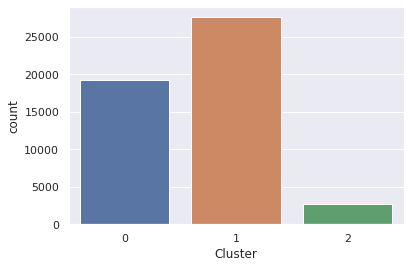

In [0]:
# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

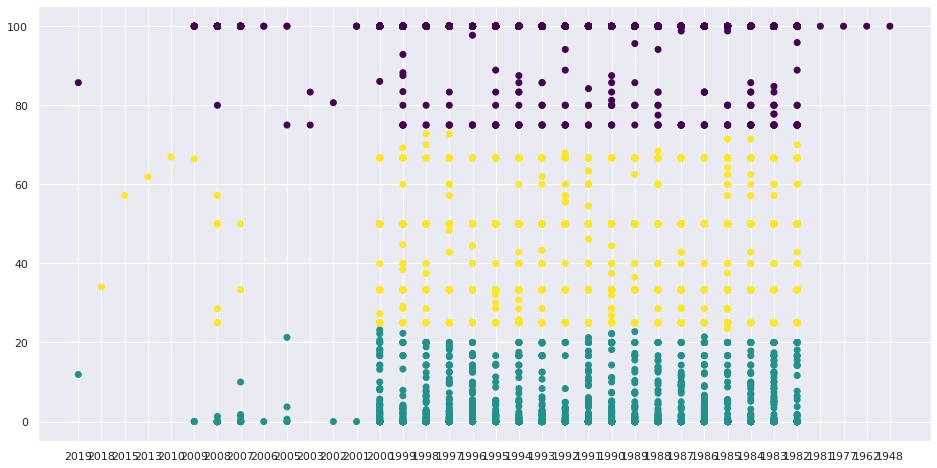

In [0]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Event.Year", y = "Injured.Percentage", c = "Cluster", cmap = 'viridis', data = X_labeled)

The clusters can be interpreted as most accidents  seems to have a very low percentage of Injury, next highest in the median range of Injured.Percentage while a few of the accidents have had very high levels of Injured.Percentage even reaching a 100%.

In [0]:
# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)

Within Cluster Sum of Squares : 2157638.7087497446


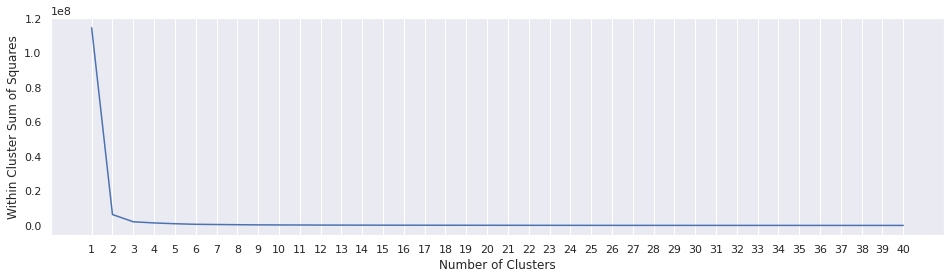

In [0]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

Cluster 0:	1990.36	95.66	
Cluster 1:	1990.02	1.11	

Within Cluster Sum of Squares : 6362079.319344601



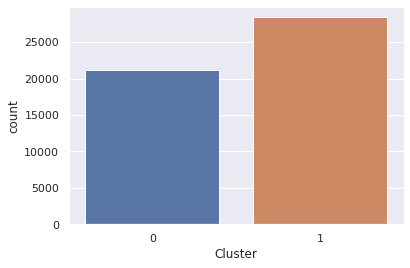

In [0]:
# Set "optimal" Number of Clusters
num_clust = 2

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

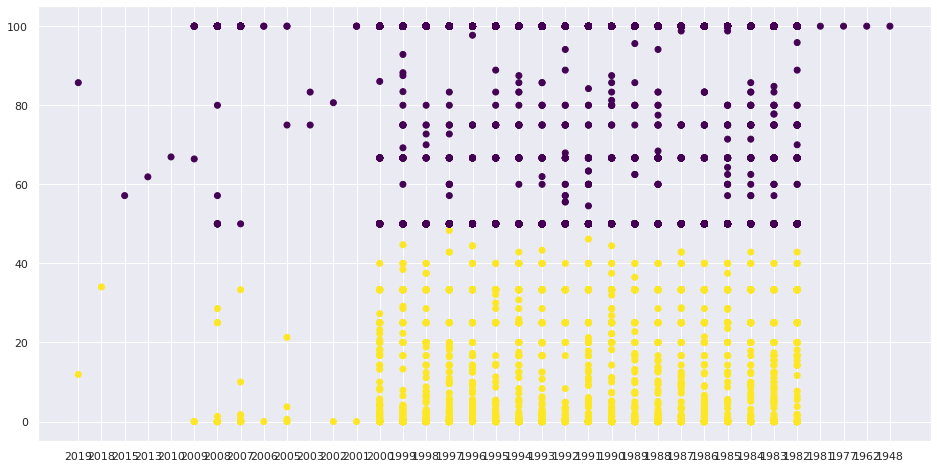

In [0]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Event.Year", y = "Injured.Percentage", c = "Cluster", cmap = 'viridis', data = X_labeled)

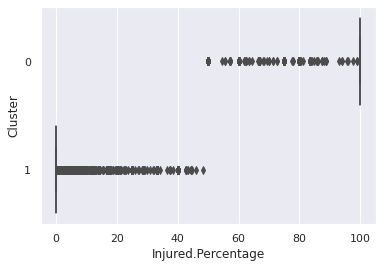

In [0]:
sb.boxplot(x = "Injured.Percentage", y = "Cluster", data = X_labeled)

## Decision Tree

In [0]:
RNullInjuries = pd.DataFrame(aviationData.dropna(how='all' , subset = ["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"]))

RNullInjuries["Total.Injured"] = RNullInjuries["Total.Fatal.Injuries"] + RNullInjuries["Total.Serious.Injuries"] + RNullInjuries["Total.Minor.Injuries"]
RNullInjuries["Total.Pass"] = RNullInjuries["Total.Injured"] + RNullInjuries["Total.Uninjured"]
RNullInjuries["Injured.Percentage"] = RNullInjuries["Total.Injured"] / RNullInjuries["Total.Pass"] * 100

RNullInjuries["Total.Pass"].fillna(0, inplace = True)
RNullInjuries["Total.Injured"].fillna(0, inplace = True)
RNullInjuries["Injured.Percentage"].fillna(0, inplace = True)

RNullInjuries["Injury.Severity"] = RNullInjuries["Injury.Severity"].apply(lambda x: re.sub(r'(Fatal)(.+)',r'\1', x))

In [0]:
#Importing the necessary modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import confusion_matrix

Making all categorical columns into numeric using LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder

#acdmg_types = ("Substantial" , "Destroyed" , "Minor")
#acdmg_df = pd.DataFrame(RNullInjuries)

number = LabelEncoder()

RNullInjuries['Aircraft.Damage_Cat'] = number.fit_transform(RNullInjuries['Aircraft.Damage'].astype('str'))
RNullInjuries['Aircraft.Category_Cat'] = number.fit_transform(RNullInjuries['Aircraft.Category'].astype('str'))
RNullInjuries['Amateur.Built_Cat'] = number.fit_transform(RNullInjuries['Amateur.Built'].astype('str'))
RNullInjuries['Weather.Condition_Cat'] = number.fit_transform(RNullInjuries['Weather.Condition'].astype('str'))
RNullInjuries['Country_Cat'] = number.fit_transform(RNullInjuries['Country'].astype('str'))
RNullInjuries['Broad.Phase.of.Flight_Cat'] = number.fit_transform(RNullInjuries['Broad.Phase.of.Flight'].astype('str'))


RNullInjuries = pd.DataFrame(RNullInjuries.dropna(how='any' , subset = ['Aircraft.Damage_Cat','Aircraft.Category_Cat','Amateur.Built_Cat','Weather.Condition_Cat','Country_Cat','Broad.Phase.of.Flight_Cat', 'Number.of.Engines']))

RNullInjuries

Event.Id  ... Broad.Phase.of.Flight_Cat
0      20200102X82407  ...                         9
1      20191231X83852  ...                         9
2      20200102X54844  ...                        12
4      20191228X62945  ...                        12
5      20191228X23853  ...                         9
...               ...  ...                       ...
84256  20170710X52551  ...                         1
84258  20001218X45448  ...                         2
84259  20061025X01555  ...                         2
84260  20001218X45447  ...                        11
84261  20001218X45444  ...                         2

[79228 rows x 43 columns]

Using new numerical values to try plot Decision Tree

In [0]:
X1 = ['Aircraft.Damage_Cat' , 'Aircraft.Category_Cat' , 'Amateur.Built_Cat' , 'Number.of.Engines', 'Weather.Condition_Cat' , 'Country_Cat' , 'Broad.Phase.of.Flight_Cat']

X = pd.DataFrame(RNullInjuries[X1])
Y = pd.DataFrame(RNullInjuries['Injury.Severity'])

X_train, X_test, y_train, y_test = train_test_split( X , Y , test_size = 0.2)

dectree = DecisionTreeClassifier()

dectree.fit(X_train, y_train)


treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
graphviz.Source(treedot)

From this huge decision tree, we can come to one conclusion. We look at the first node that was used to divide the data. We see that the variable it used is Aircraft.Damage_Cat which shows that it is the most important variable that can affected the Injury.Severity.

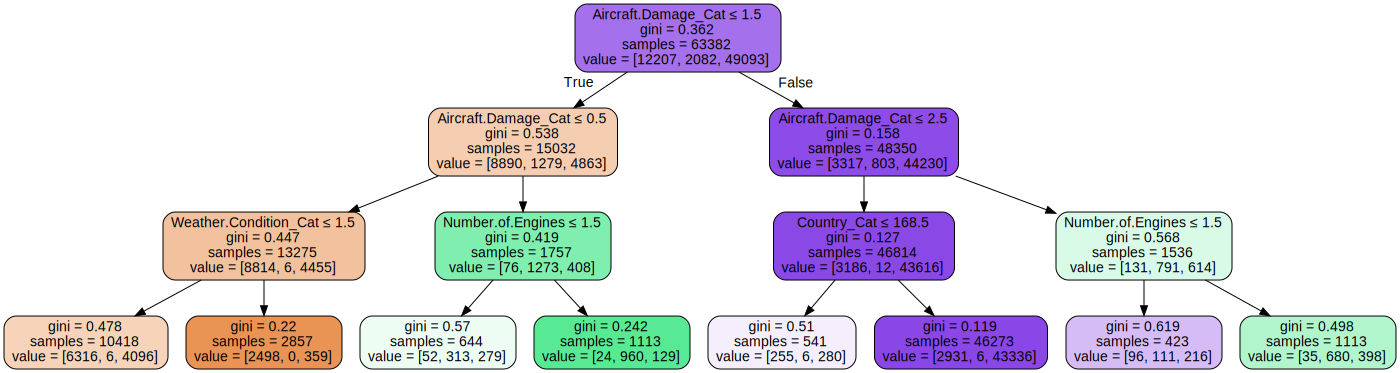

In [0]:
X1 = ['Aircraft.Damage_Cat' , 'Aircraft.Category_Cat' , 'Amateur.Built_Cat' , 'Number.of.Engines', 'Weather.Condition_Cat' , 'Country_Cat' , 'Broad.Phase.of.Flight_Cat']

X = pd.DataFrame(RNullInjuries[X1])
Y = pd.DataFrame(RNullInjuries['Injury.Severity'])

X_train, X_test, y_train, y_test = train_test_split( X , Y , test_size = 0.2)

dectree = DecisionTreeClassifier()

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 3)

dectree.fit(X_train, y_train)


treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
graphviz.Source(treedot)

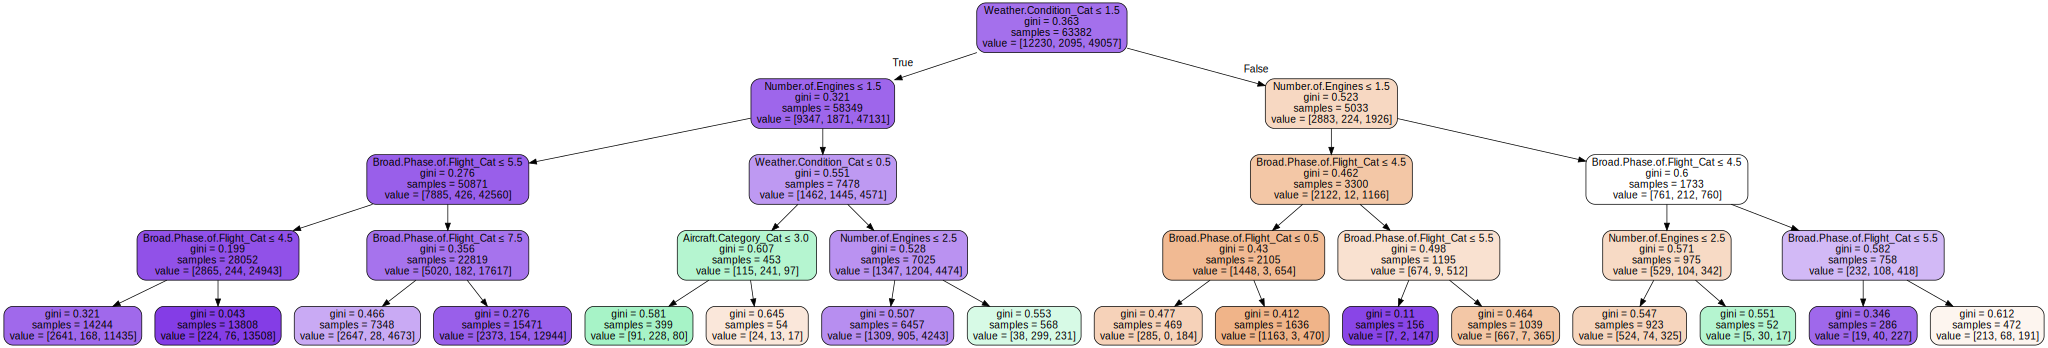

In [0]:
X2 = [ 'Aircraft.Category_Cat' , 'Amateur.Built_Cat' , 'Number.of.Engines', 'Weather.Condition_Cat' , 'Country_Cat' , 'Broad.Phase.of.Flight_Cat']

X = pd.DataFrame(RNullInjuries[X2])
Y = pd.DataFrame(RNullInjuries['Injury.Severity'])

X_train, X_test, y_train, y_test = train_test_split( X , Y , test_size = 0.2)

dectree = DecisionTreeClassifier()

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

dectree.fit(X_train, y_train)


treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
graphviz.Source(treedot)


______
Confusion Matrix

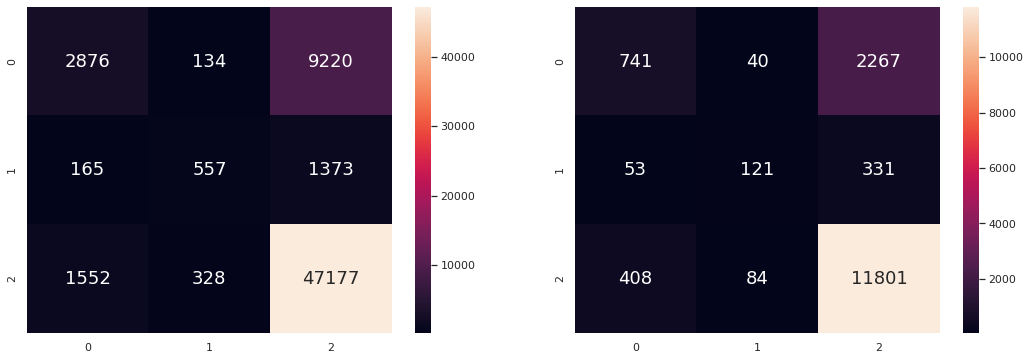

In [0]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(18, 6))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [0]:
cm = confusion_matrix(y_train, y_train_pred)
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
print("Parameters of Train Model")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Positive Rate \t: %.2f" %(tp/(tp+fp)))
print("True Negative Rate \t: %.2f" %(tn/(tn+fn)))
print("False Positive Rate \t: %.2f" %(fp/(tp+fp)))
print("False Negative Rate \t: %.2f" %(fn/(tn+fn)))

print("\n")

cm = confusion_matrix(y_test, y_test_pred)
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
print("Parameters of Test Model")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Positive Rate \t: %.2f" %(tp/(tp+fp)))
print("True Negative Rate \t: %.2f" %(tn/(tn+fn)))
print("False Positive Rate \t: %.2f" %(fp/(tp+fp)))
print("False Negative Rate \t: %.2f" %(fn/(tn+fn)))

Parameters of Train Model
Classification Accuracy 	: 0.7984916853365309
True Positive Rate 	: 0.81
True Negative Rate 	: 0.95
False Positive Rate 	: 0.19
False Negative Rate 	: 0.05


Parameters of Test Model
Classification Accuracy 	: 0.7991291177584249
True Positive Rate 	: 0.75
True Negative Rate 	: 0.93
False Positive Rate 	: 0.25
False Negative Rate 	: 0.07


Trying one category against another

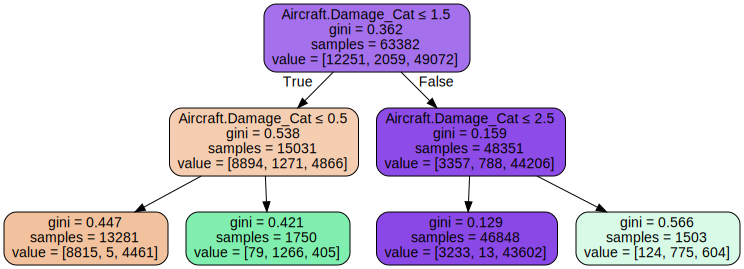

In [0]:
X1 = ['Aircraft.Damage_Cat']

X = pd.DataFrame(RNullInjuries[X1])
Y = pd.DataFrame(RNullInjuries['Injury.Severity'])

X_train, X_test, y_train, y_test = train_test_split( X , Y , test_size = 0.2)

dectree = DecisionTreeClassifier()

dectree.fit(X_train, y_train)


treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
graphviz.Source(treedot)

In [0]:
X1 = ['Aircraft.Damage_Cat' , 'Aircraft.Category_Cat' , 'Amateur.Built_Cat' , 'Number.of.Engines', 'Weather.Condition_Cat' , 'Country_Cat' , 'Broad.Phase.of.Flight_Cat']

X = pd.DataFrame(RNullInjuries[X1])
y = pd.DataFrame(RNullInjuries['Injury.Severity'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 2115    21   982]
 [   14   432    68]
 [  799    81 11334]]
              precision    recall  f1-score   support

       Fatal       0.72      0.68      0.70      3118
    Incident       0.81      0.84      0.82       514
   Non-Fatal       0.92      0.93      0.92     12214

    accuracy                           0.88     15846
   macro avg       0.82      0.82      0.82     15846
weighted avg       0.87      0.88      0.87     15846



In [0]:
RNullInjuries['Injury.Severity_Cat'] = number.fit_transform(RNullInjuries['Injury.Severity'].astype('str'))

X1 = ['Aircraft.Damage_Cat' , 'Aircraft.Category_Cat' , 'Amateur.Built_Cat' , 'Number.of.Engines', 'Weather.Condition_Cat' , 'Country_Cat' , 'Broad.Phase.of.Flight_Cat']

X = pd.DataFrame(RNullInjuries[X1])
y = pd.DataFrame(RNullInjuries['Injured.Percentage'])

y.loc[y["Injured.Percentage"] <= 50, "Injured.Percentage"] = 0
y.loc[y["Injured.Percentage"] > 50, "Injured.Percentage"] = 1

print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

dectree = DecisionTreeClassifier()

dectree.fit(X_train, y_train)


treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
graphviz.Source(treedot)

       Injured.Percentage
0                     0.0
1                     0.0
2                     0.0
4                     0.0
5                     0.0
...                   ...
84256                 0.0
84258                 1.0
84259                 0.0
84260                 1.0
84261                 1.0

[79228 rows x 1 columns]


       Injured.Percentage
0                     0.0
1                     0.0
2                     0.0
4                     0.0
5                     0.0
...                   ...
84256                 0.0
84258                 1.0
84259                 0.0
84260                 1.0
84261                 1.0

[79228 rows x 1 columns]


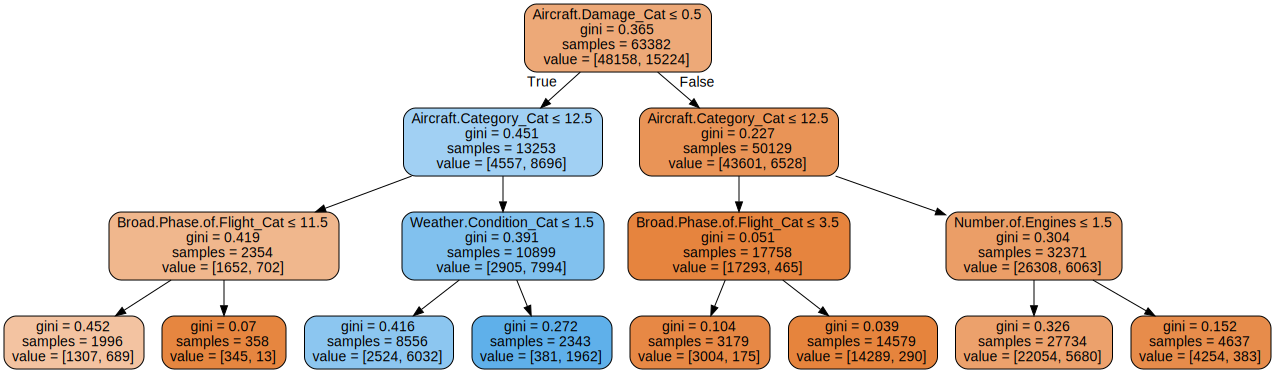

In [0]:
RNullInjuries['Injury.Severity_Cat'] = number.fit_transform(RNullInjuries['Injury.Severity'].astype('str'))

X1 = ['Aircraft.Damage_Cat' , 'Aircraft.Category_Cat' , 'Amateur.Built_Cat' , 'Number.of.Engines', 'Weather.Condition_Cat' , 'Country_Cat' , 'Broad.Phase.of.Flight_Cat']

X = pd.DataFrame(RNullInjuries[X1])
y = pd.DataFrame(RNullInjuries['Injured.Percentage'])

y.loc[y["Injured.Percentage"] <= 50, "Injured.Percentage"] = 0
y.loc[y["Injured.Percentage"] > 50, "Injured.Percentage"] = 1

print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

dectree = DecisionTreeClassifier(max_depth = 3)

dectree.fit(X_train, y_train)


treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
graphviz.Source(treedot)

       Injured.Percentage
0                     0.0
1                     0.0
2                     0.0
4                     0.0
5                     0.0
...                   ...
84256                 0.0
84258                 1.0
84259                 0.0
84260                 1.0
84261                 1.0

[79228 rows x 1 columns]


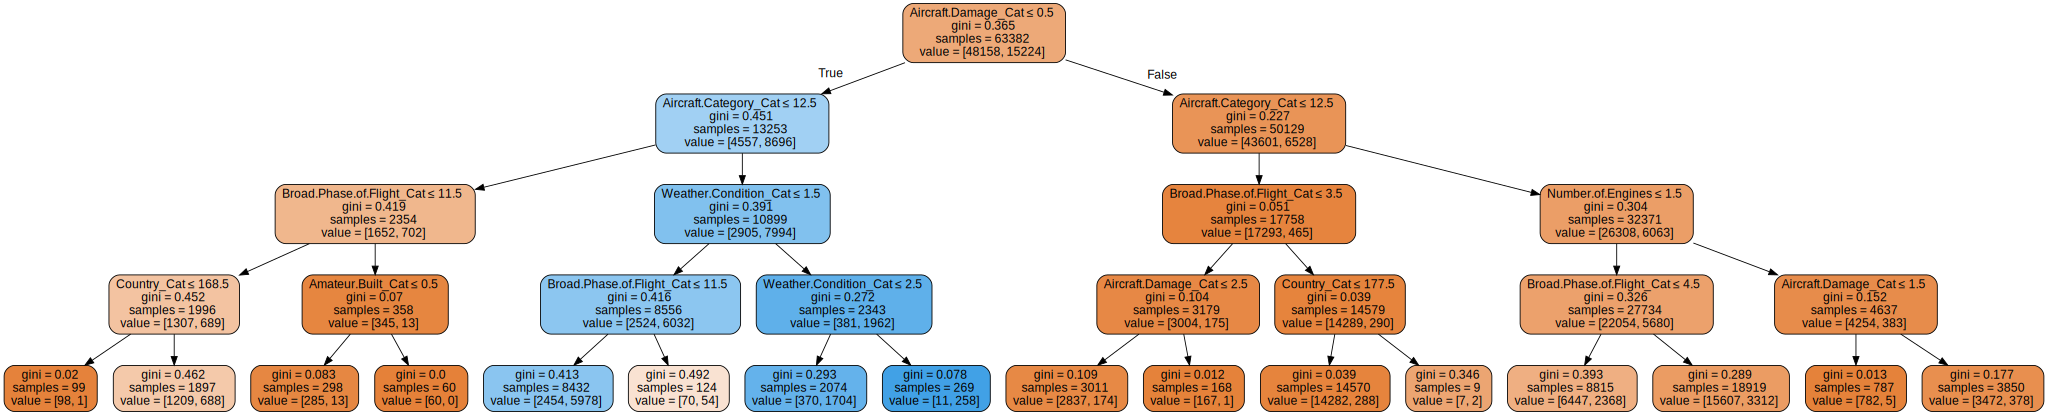

In [0]:
RNullInjuries['Injury.Severity_Cat'] = number.fit_transform(RNullInjuries['Injury.Severity'].astype('str'))

X1 = ['Aircraft.Damage_Cat' , 'Aircraft.Category_Cat' , 'Amateur.Built_Cat' , 'Number.of.Engines', 'Weather.Condition_Cat' , 'Country_Cat' , 'Broad.Phase.of.Flight_Cat']

X = pd.DataFrame(RNullInjuries[X1])
y = pd.DataFrame(RNullInjuries['Injured.Percentage'])

y.loc[y["Injured.Percentage"] <= 50, "Injured.Percentage"] = 0
y.loc[y["Injured.Percentage"] > 50, "Injured.Percentage"] = 1

print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

dectree = DecisionTreeClassifier(max_depth = 4)

dectree.fit(X_train, y_train)


treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
graphviz.Source(treedot)

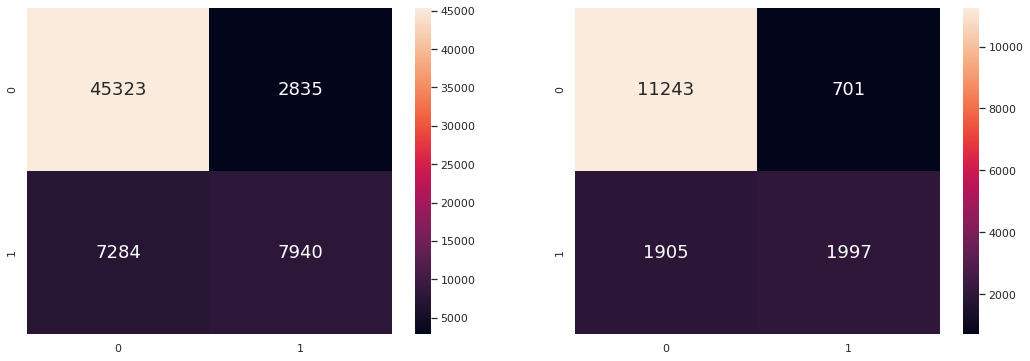

In [0]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(18, 6))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [0]:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("Parameters of Train Model")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Positive Rate \t: %.2f" %(tp/(tp+fp)))
print("True Negative Rate \t: %.2f" %(tn/(tn+fn)))
print("False Positive Rate \t: %.2f" %(fp/(tp+fp)))
print("False Negative Rate \t: %.2f" %(fn/(tn+fn)))

print("\n")

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("Parameters of Test Model")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Positive Rate \t: %.2f" %(tp/(tp+fp)))
print("True Negative Rate \t: %.2f" %(tn/(tn+fn)))
print("False Positive Rate \t: %.2f" %(fp/(tp+fp)))
print("False Negative Rate \t: %.2f" %(fn/(tn+fn)))

Parameters of Train Model
Classification Accuracy 	: 0.8403489949828027
True Positive Rate 	: 0.74
True Negative Rate 	: 0.86
False Positive Rate 	: 0.26
False Negative Rate 	: 0.14


Parameters of Test Model
Classification Accuracy 	: 0.8355420926416761
True Positive Rate 	: 0.74
True Negative Rate 	: 0.86
False Positive Rate 	: 0.26
False Negative Rate 	: 0.14


The above model was used to try to predict that Injury.Percentage of a particular accident. Since Injury.Percentage is a Numeric variable, it was converted into a categorical variable by using Injured.Percentage below 50% as 0 and the rest as 1. 

Again, Aircraft.Damage_Cat is the most important variable.

In [0]:
RNullInjuries = pd.DataFrame(aviationData.dropna(how='all' , subset = ["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"]))

RNullInjuries["Total.Fatal.Injuries"].fillna(0, inplace = True)
RNullInjuries["Total.Serious.Injuries"].fillna(0, inplace = True)
RNullInjuries["Total.Minor.Injuries"].fillna(0, inplace = True)
RNullInjuries["Total.Uninjured"].fillna(0, inplace = True)

RNullInjuries["Total.Injured"] = RNullInjuries["Total.Fatal.Injuries"] + RNullInjuries["Total.Serious.Injuries"] + RNullInjuries["Total.Minor.Injuries"]
RNullInjuries["Total.Pass"] = RNullInjuries["Total.Injured"] + RNullInjuries["Total.Uninjured"]
RNullInjuries["Injured.Percentage"] = RNullInjuries["Total.Injured"] / RNullInjuries["Total.Pass"] * 100

RNullInjuries["Total.Pass"].fillna(0, inplace = True)
RNullInjuries["Total.Injured"].fillna(0, inplace = True)
RNullInjuries["Injured.Percentage"].fillna(0, inplace = True)

RNullInjuries["Injury.Severity"] = RNullInjuries["Injury.Severity"].apply(lambda x: re.sub(r'(Fatal)(.+)',r'\1', x))

number = LabelEncoder()

RNullInjuries['Aircraft.Damage_Cat'] = number.fit_transform(RNullInjuries['Aircraft.Damage'].astype('str'))
RNullInjuries['Aircraft.Category_Cat'] = number.fit_transform(RNullInjuries['Aircraft.Category'].astype('str'))
RNullInjuries['Amateur.Built_Cat'] = number.fit_transform(RNullInjuries['Amateur.Built'].astype('str'))
RNullInjuries['Weather.Condition_Cat'] = number.fit_transform(RNullInjuries['Weather.Condition'].astype('str'))
RNullInjuries['Country_Cat'] = number.fit_transform(RNullInjuries['Country'].astype('str'))
RNullInjuries['Broad.Phase.of.Flight_Cat'] = number.fit_transform(RNullInjuries['Broad.Phase.of.Flight'].astype('str'))

#RNullInjuries['Injury.Severity_Cat'] = number.fit_transform(RNullInjuries['Injury.Severity'].astype('str'))

X1 = ['Aircraft.Damage_Cat' , 'Aircraft.Category_Cat' , 'Amateur.Built_Cat' , 'Number.of.Engines', 'Weather.Condition_Cat' , 'Country_Cat' , 'Broad.Phase.of.Flight_Cat']

for i in range(len(X1)):
    
    dropped = pd.DataFrame(RNullInjuries.dropna(how='all' , subset = [X1[i]]))
    X = pd.DataFrame(dropped[X1[i]])
    y = pd.DataFrame(dropped['Injured.Percentage'])

    y.loc[y["Injured.Percentage"] <= 50, "Injured.Percentage"] = 0
    y.loc[y["Injured.Percentage"] > 50, "Injured.Percentage"] = 1

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    dectree = DecisionTreeClassifier()

    dectree.fit(X_train, y_train)

    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)

    print("This is " + X1[i] + " against Injured Percentage \n")
    
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
    print("Parameters of Train Model")
    print("Classification Accuracy \t:", dectree.score(X_train, y_train))
    print("True Positive Rate \t: %.2f" %(tp/(tp+fp)))
    print("True Negative Rate \t: %.2f" %(tn/(tn+fn)))
    print("False Positive Rate \t: %.2f" %(fp/(tp+fp)))
    print("False Negative Rate \t: %.2f" %(fn/(tn+fn)))

    print("")
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    print("Parameters of Test Model")
    print("Classification Accuracy \t:", dectree.score(X_test, y_test))
    print("True Positive Rate \t: %.2f" %(tp/(tp+fp)))
    print("True Negative Rate \t: %.2f" %(tn/(tn+fn)))
    print("False Positive Rate \t: %.2f" %(fp/(tp+fp)))
    print("False Negative Rate \t: %.2f" %(fn/(tn+fn)))
    
    print("\n \n")

This is Aircraft.Damage_Cat against Injured Percentage 

Parameters of Train Model
Classification Accuracy 	: 0.7598540254268717
True Positive Rate 	: 0.87
True Negative Rate 	: 0.73
False Positive Rate 	: 0.13
False Negative Rate 	: 0.27

Parameters of Test Model
Classification Accuracy 	: 0.7638402658280424
True Positive Rate 	: 0.88
True Negative Rate 	: 0.73
False Positive Rate 	: 0.12
False Negative Rate 	: 0.27

 

This is Aircraft.Category_Cat against Injured Percentage 

Parameters of Train Model
Classification Accuracy 	: 0.6029610289427227
True Positive Rate 	: 0.70
True Negative Rate 	: 0.60
False Positive Rate 	: 0.30
False Negative Rate 	: 0.40

Parameters of Test Model
Classification Accuracy 	: 0.601910639055361
True Positive Rate 	: 0.70
True Negative Rate 	: 0.60
False Positive Rate 	: 0.30
False Negative Rate 	: 0.40

 

This is Amateur.Built_Cat against Injured Percentage 

Parameters of Train Model
Classification Accuracy 	: 0.6195166817487279
True Positive Rate 	: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in long_scalars


Classification Accuracy 	: 0.6339657909181267
True Positive Rate 	: 0.70
True Negative Rate 	: 0.63
False Positive Rate 	: 0.30
False Negative Rate 	: 0.37

Parameters of Test Model
Classification Accuracy 	: 0.6334183824838308
True Positive Rate 	: 0.70
True Negative Rate 	: 0.63
False Positive Rate 	: 0.30
False Negative Rate 	: 0.37

 

This is Country_Cat against Injured Percentage 

Parameters of Train Model
Classification Accuracy 	: 0.6118915871767865
True Positive Rate 	: 0.65
True Negative Rate 	: 0.61
False Positive Rate 	: 0.35
False Negative Rate 	: 0.39

Parameters of Test Model
Classification Accuracy 	: 0.6106924583160268
True Positive Rate 	: 0.64
True Negative Rate 	: 0.61
False Positive Rate 	: 0.36
False Negative Rate 	: 0.39

 

This is Broad.Phase.of.Flight_Cat against Injured Percentage 

Parameters of Train Model
Classification Accuracy 	: 0.6499428859647821
True Positive Rate 	: 0.59
True Negative Rate 	: 0.67
False Positive Rate 	: 0.41
False Negative Rate 	: 0

By looking at the classification accuracies of the induvidual variables against the Injured.Percentage, we get to see that Aircraft.Damage has the highest accuracy in predicting the intesity of the Injury. The next most important variables are Weather.Condition and Broad.Phase.of.Flight.

## Conclusion

From the analysis and study of the Aviation Accident Database, we can come to the following conclusions:

1. Aircraft.Damage is the most important factor in deciding the Injured.Percentage followed by Broad.Base.of.Flight and Weather.Condition.
2. Outside the USA; Brazil, Canada, Mexico, United Kingdom and Australia have the most accidents.  
3. Through these time series, we can see clearly that the number of accidents have reduced over time. This is probably because of the betterment of technology and safety measures.
4. Although the database mainly consists of data from the United States, a majority of the accidents in the United States remained Non-Fatal and a small percentage were Fatal. This is not the case for countries outside the US. The number of Fatal Accidents were more than that of Non-Fatal cases.
5. The make CESSNA seems to have the most number of accidents.
6. United airlines had the most number of accidents with American Airlines being a close second.

_________



Learning points:

*   Cleaning of data is very important as most datasets will not be perfect or ideal for exploration without prior processing and thought.
*   It has been interesting to formulate our own response variable for comparision to different factors of an accident.
  * We learnt different issues will arise when using a new variable, such as how some trends appear while others are lost.
  * Especially because we made a new variable and the cleaning of data had to be emphasized, or else more than just the graphs would change, data might change drastically.

*   Data that seems unuseful can still be explored to gain useful information. 
  * In our case, we were able to produce a map using 'Longitude'/'Lattitude' variable and plotted different colours to represent the category of %injuries in for each accident.  


## References

https://ramiro.org/notebook/geopandas-choropleth/

http://geospatialtraining.com/tutorial-creating-a-pandas-dataframe-from-a-shapefile/

https://gist.github.com/tadast/8827699#file-countries_codes_and_coordinates-csv

https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe

https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

https://thispointer.com/pandas-drop-rows-from-a-dataframe-with-missing-values-or-nan-in-columns/

https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/

https://www.naturalearthdata.com/downloads/50m-cultural-vectors/50m-admin-0-countries-2/

https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c


